# Project Title: Black Friday Purchase

## Goal: Making prediction of purchases on the New Input Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from zipfile import ZipFile
import os

In [2]:
train_data=pd.read_csv(os.path.join("datasets/train.csv"))
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
test_data = pd.read_csv(os.path.join("datasets/test.csv"))
test_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
train_data.shape, test_data.shape

((550068, 12), (233599, 11))

Description of what the features stands for is shown below;
- User_ID: Unique ID of the user.

- Product_ID: Unique ID of the product.

- Gender: indicates the gender of the person making the transaction.

- Age: indicates the age group of the person making the transaction.

- Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

- City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

- Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

- Marital_Status: is 0 if the user is not married and 1 otherwise.

- Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

- Purchase: Purchase amount (Target)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
train_data.describe(include="all").T.style.highlight_max(color="yellow")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.000000,nan,nan,nan,1003028.842401,1727.591586,1000001.000000,1001516.000000,1003077.000000,1004478.000000,1006040.000000
Product_ID,550068,3631,P00265242,1880,nan,nan,nan,nan,nan,nan,nan
Gender,550068,2,M,414259,nan,nan,nan,nan,nan,nan,nan
Age,550068,7,26-35,219587,nan,nan,nan,nan,nan,nan,nan
Occupation,550068.000000,nan,nan,nan,8.076707,6.522660,0.000000,2.000000,7.000000,14.000000,20.000000
City_Category,550068,3,B,231173,nan,nan,nan,nan,nan,nan,nan
Stay_In_Current_City_Years,550068,5,1,193821,nan,nan,nan,nan,nan,nan,nan
Marital_Status,550068.000000,nan,nan,nan,0.409653,0.491770,0.000000,0.000000,0.000000,1.000000,1.000000
Product_Category_1,550068.000000,nan,nan,nan,5.404270,3.936211,1.000000,1.000000,5.000000,8.000000,20.000000
Product_Category_2,376430.000000,nan,nan,nan,9.842329,5.086590,2.000000,5.000000,9.000000,15.000000,18.000000


# Data Cleaning

In [7]:
train_col = train_data.columns.to_list()
test_col = test_data.columns.to_list()

for col in train_col:
    if train_data[col].isnull().any()==True:
        print(f"The percentage of null columns in column {col} is {round(train_data[col].isnull().mean() * 100, 2)}%")


The percentage of null columns in column Product_Category_2 is 31.57%
The percentage of null columns in column Product_Category_3 is 69.67%


In [8]:
for col in test_col:
    if test_data[col].isnull().any()==True:
        print(f"The percentage of null columns in column {col} is {round(test_data[col].isnull().mean() * 100, 2)}%")

The percentage of null columns in column Product_Category_2 is 30.97%
The percentage of null columns in column Product_Category_3 is 69.59%


**Filling the missing value in the datasets for analysis:**

In [9]:
train_set = train_data.copy()
test_set = test_data.copy()
#Dropping Product_Category_3 feature from the data
train_set = train_set.drop('Product_Category_3', axis=1)
test_set = test_set.drop('Product_Category_3', axis=1)

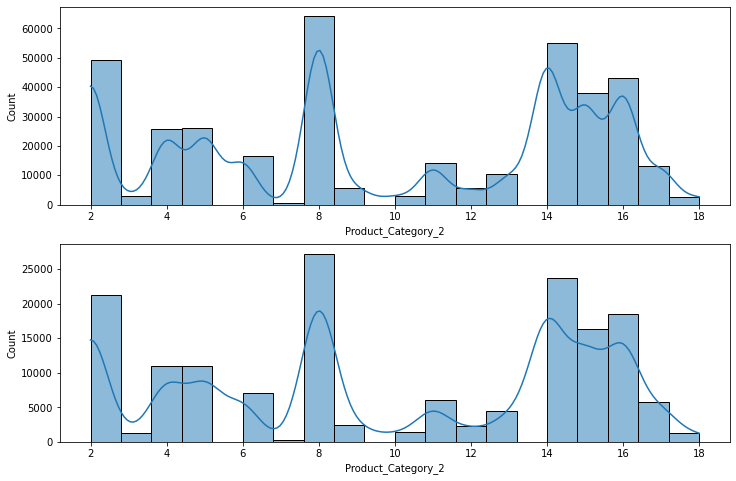

In [10]:
fig, axes=plt.subplots(nrows = 2, ncols = 1, figsize=(12,8))
data = [train_set, test_set]

for dt, ax in zip(data, axes):
    sns.histplot(data = dt["Product_Category_2"], kde=True, bins=20, ax=ax)

In [11]:
#Filling missing values in Product_Category_2
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean")
train_set.Product_Category_2 = imputer.fit_transform(train_set[['Product_Category_2']])
test_set.Product_Category_2 = imputer.fit_transform(test_set[['Product_Category_2']])

In [12]:
# print(np.mean(train_set.Product_Category_2))
# print(np.std(train_set.Product_Category_2))
# print(np.mean(test_set.Product_Category_2))
# print(np.std(test_set.Product_Category_2))

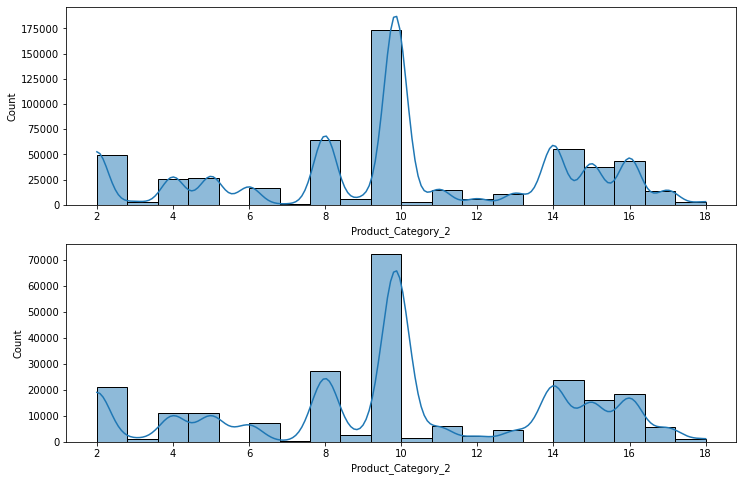

In [13]:
fig, axes=plt.subplots(nrows = 2, ncols = 1, figsize=(12,8))
data = [train_set, test_set]

for dt, ax in zip(data, axes):
    sns.histplot(data = dt["Product_Category_2"], kde=True, bins=20, ax=ax)

In [14]:
# #Filling missing values in Product_Category_2
# from sklearn.impute import SimpleImputer

# train_set

# strategies = ["median", "mean", "most_frequent"]
# train_set_mean_values, train_set_std_values, test_set_mean_values, test_set_std_values = [],[],[],[]


# for i in strategies:
#     train_set_ = train_set.copy()
#     test_set_ = test_set.copy()
#     imputer = SimpleImputer(strategy = i)
#     train_set_.Product_Category_2 = imputer.fit_transform(train_set_[['Product_Category_2']])
#     test_set_.Product_Category_2 = imputer.fit_transform(test_set_[['Product_Category_2']])
#     train_set_mean_values.append((i, np.mean(train_set_.Product_Category_2)))
#     train_set_std_values.append((i, np.std(train_set_.Product_Category_2)))
#     test_set_mean_values.append((i, np.mean(test_set_.Product_Category_2)))
#     test_set_std_values.append((i, np.std(test_set_.Product_Category_2)))
    
    

In [15]:
# train_set_mean_values, train_set_std_values, test_set_mean_values, test_set_std_values

In [16]:
train_set.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Purchase                      False
dtype: bool

# EDA - Exploratory Data Analysis

Let's explore some things about our data


>Which gender purchased the most?

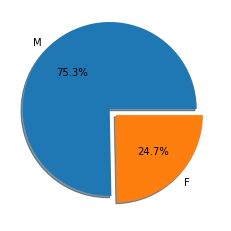

In [17]:
gender_ration = train_set["Gender"].value_counts()
plt.pie(gender_ration, explode=[0.1, 0], labels=gender_ration.index, autopct='%1.1f%%', shadow=True);

75.3% of the customers that made purchases were males

> Who bought more expensive things among the gender?

In [18]:
male_mean_purchase = train_set[train_set.Gender == 'M'].Purchase.mean()
female_mean_purchase = train_set[train_set.Gender == 'F'].Purchase.mean()
print(f'The mean Male Purchase: {male_mean_purchase}')
print(f'The mean Female Purchase: {female_mean_purchase}')

The mean Male Purchase: 9437.526040472265
The mean Female Purchase: 8734.565765155476


## Occupation

> Wich Occupation has the highest buyer?

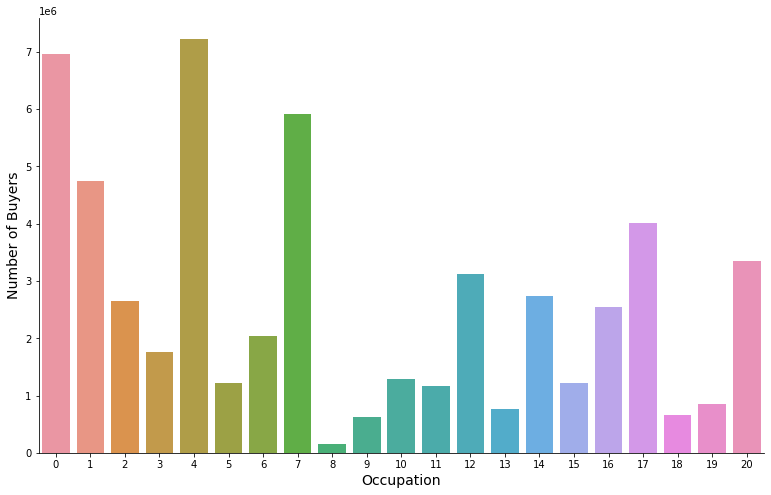

In [19]:
fig, ax = plt.subplots(figsize=(13,8))
occupation_ration = round(train_set.Occupation.value_counts()*100, 2)
sns.barplot(x=occupation_ration.index, y=occupation_ration)
plt.ylabel('Number of Buyers', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
sns.despine();

The occupation that purchased the most goods is occupation 4

> Which Occupation bought expensive goods the most?

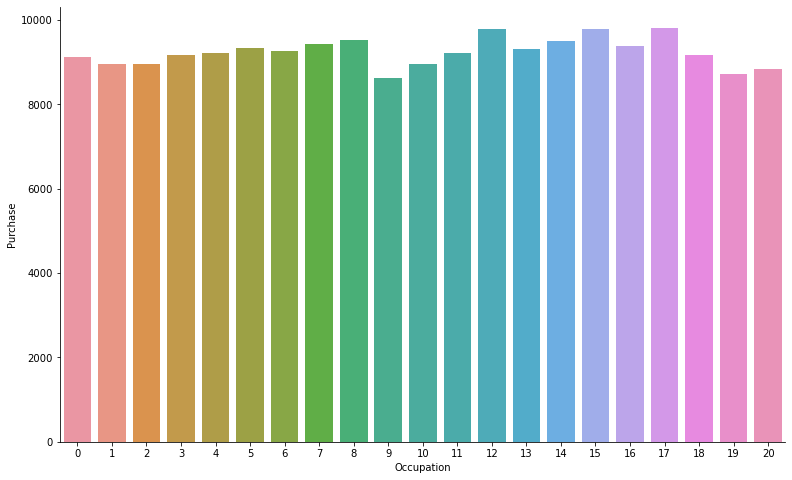

In [20]:
plt.figure(figsize = (13, 8))
sns.barplot(x=train_set.groupby('Occupation')['Purchase'].mean().index, y=train_set.groupby('Occupation')['Purchase'].mean())
sns.despine();

## Age

In [21]:
train_set.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

What age category purchased the most goods?

In [22]:
age_percent = round(train_set.Age.value_counts()*100, 2)

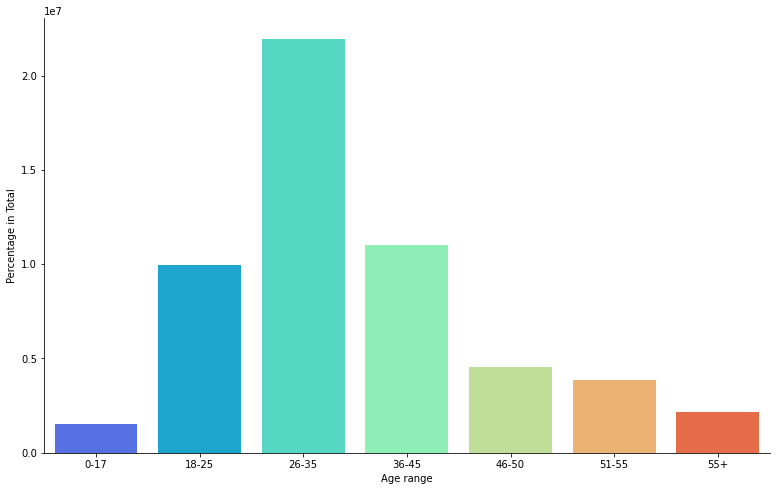

In [23]:
plt.figure(figsize=(13, 8))
sns.barplot(y=age_percent, x=age_percent.index, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], palette='rainbow')
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+1, str(i.get_height())+'%', fontsize=12, weight='bold',
                color='black')
plt.ylabel('Percentage in Total')
plt.xlabel('Age range')
sns.despine();

> Age category that bought expensive goods mostly?

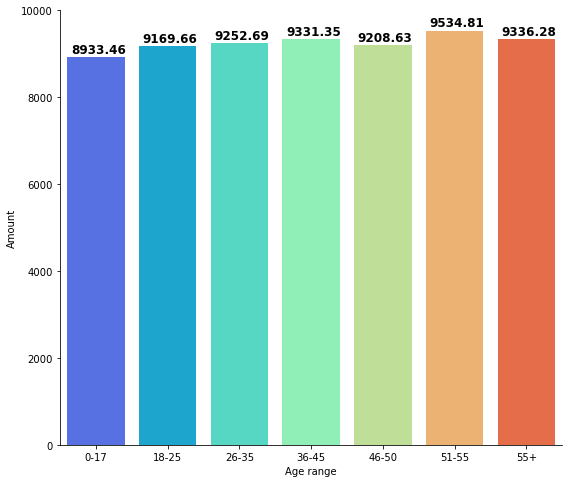

In [24]:
age_expensive = round(train_set.groupby('Age')['Purchase'].mean(), 2)
age_expensive
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(y=age_expensive, x=age_expensive.index, order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], palette='rainbow')
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+90, str(i.get_height()), fontsize=12, weight='bold',
                color='black')
plt.ylabel('Amount')
plt.xlabel('Age range')
sns.despine();

## City Category

> Which city appeared to purchase the most?

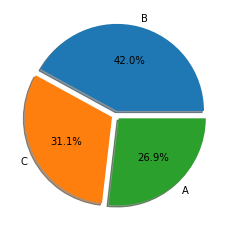

In [25]:
city_cat = train_set.City_Category.value_counts() 
plt.pie(city_cat, explode=[0.05,0.05,0.05], shadow=True, autopct='%1.1f%%', labels=city_cat.index);

> City that bought expensive goods the most?

In [26]:
city_cat_exp = round(train_set.groupby('City_Category')['Purchase'].mean(),2)

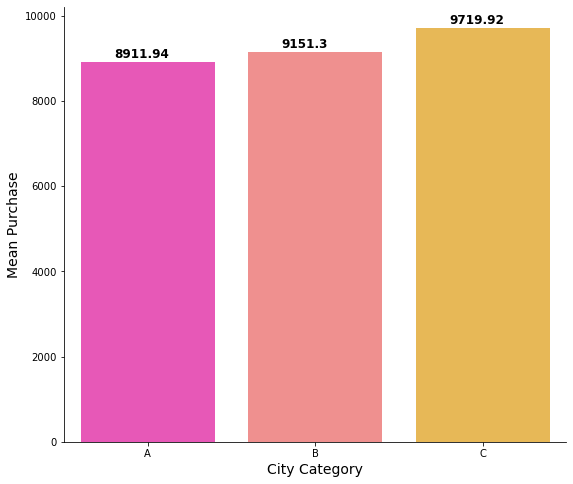

In [27]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(x=city_cat_exp.index, y=city_cat_exp, palette='spring')
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+100, str(i.get_height()), fontsize=12, weight='bold',
                color='black')
plt.ylabel('Mean Purchase', fontsize=14)
plt.xlabel('City Category', fontsize=14)
sns.despine();

It can be seen that buyers in city C buy more expensive goods compare to other cities

## Stay_In_Current_City_Years

> Does the years of stay in a city have influenced on the number of buyers?

In [28]:
years_purchase = round(train_set.Stay_In_Current_City_Years.value_counts(normalize=True)*100, 2)

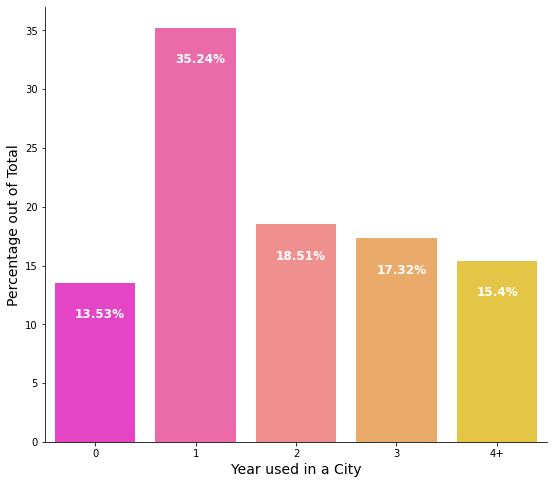

In [29]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(x=years_purchase.index, y=years_purchase, palette='spring', order=['0', '1', '2', '3', '4+'])
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()-3, str(i.get_height())+'%', fontsize=12, weight='bold',
                color='white')
plt.ylabel('Percentage out of Total', fontsize=14)
plt.xlabel('Year used in a City', fontsize=14)
sns.despine();

This shows no deep relationship between the number of years used in a city and the number of buyers.

There's just a good point in the plot above, more attention need to be on buyers that have used a year and more in a city.

> Which year of stay in a city does buyers bought expensive goods?

In [30]:
city_year_exp = train_set.groupby(['City_Category', 'Stay_In_Current_City_Years'])['Purchase'].mean().reset_index()

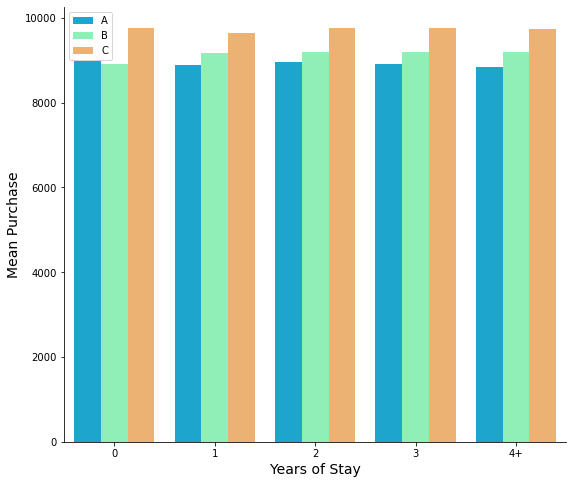

In [31]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(data=city_year_exp, x='Stay_In_Current_City_Years',
           y='Purchase', hue='City_Category', palette='rainbow');
plt.ylabel('Mean Purchase', fontsize=14)
plt.xlabel('Years of Stay', fontsize=14)
plt.legend(loc='best')
sns.despine();

It's almost the same for all the years with respect to the cities but a point could be draw from the plot; Buyers in City C buy more expensive goods for all the possible years of stay in the city.

> Which City those buyers likely stay longer in and does it influence the sales?

In [32]:
city_year = train_set.groupby('City_Category')['Stay_In_Current_City_Years'].value_counts().rename('Count').reset_index()

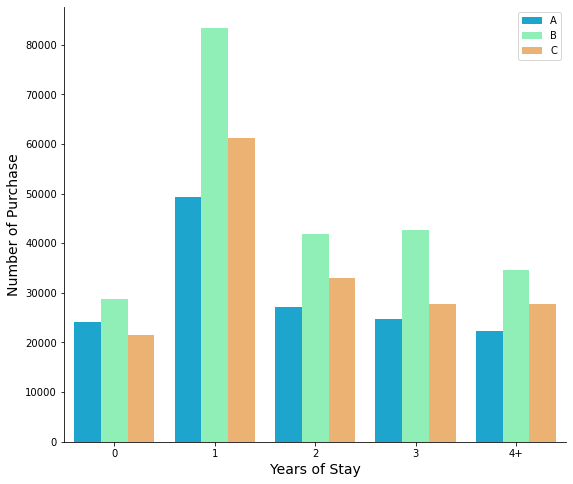

In [33]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.barplot(data=city_year, x='Stay_In_Current_City_Years',
           y='Count', hue='City_Category', palette='rainbow', order=['0', '1', '2', '3', '4+']);
plt.ylabel('Number of Purchase', fontsize=14)
plt.xlabel('Years of Stay', fontsize=14)
plt.legend(loc='best')
sns.despine();

As we have seen before, there are more buyers among people who have stayed in the city for 1 year but the majority of the buyers are in City B.

## Marital Status

> Which of the marital status (Married or Single) purchase goods the most?

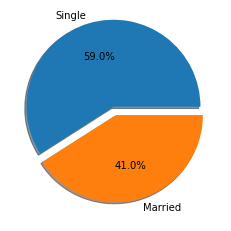

In [34]:
marital_status = train_set.Marital_Status.value_counts()
plt.pie(marital_status, explode=[0.1, 0], shadow=True, autopct='%1.1f%%', labels=['Single', 'Married']);

Single people purchase more goods so, more attention shoulf be focused on them.

In [35]:
marital_status_exp = round(train_set.groupby('Marital_Status')['Purchase'].mean(), 2)
marital_status_exp

Marital_Status
0    9265.91
1    9261.17
Name: Purchase, dtype: float64

Mean of their purchase is quite close meaning, there's a little difference in the cost of goods they purchased.

## Purchase

> Distribution of the purchase

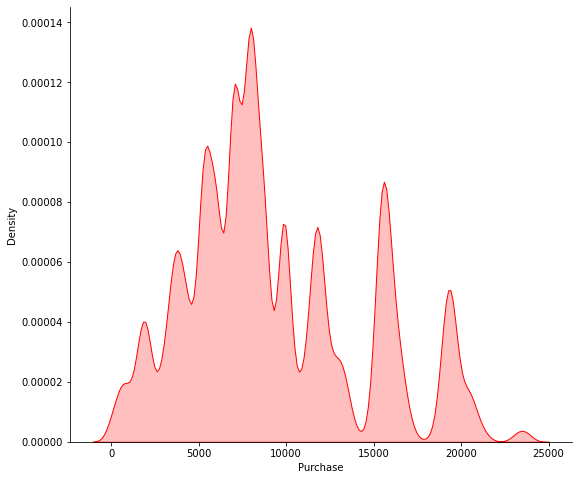

In [36]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.kdeplot(train_set.Purchase, fill=True, color='red')
sns.despine();

This shows us that the number of purchase is higher between the cost of range 5000-10000

> Checking outliers in Purchase

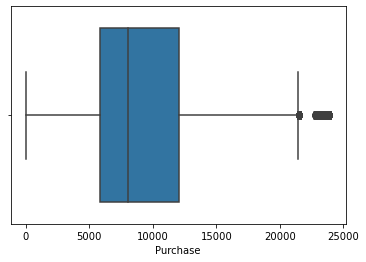

In [37]:
sns.boxplot(x=train_set.Purchase);

> Purchase distribution of the City with the highest number of purchase i.e., City C

In [38]:
city_c_purchase = train_set[train_set.City_Category == 'C'].Purchase

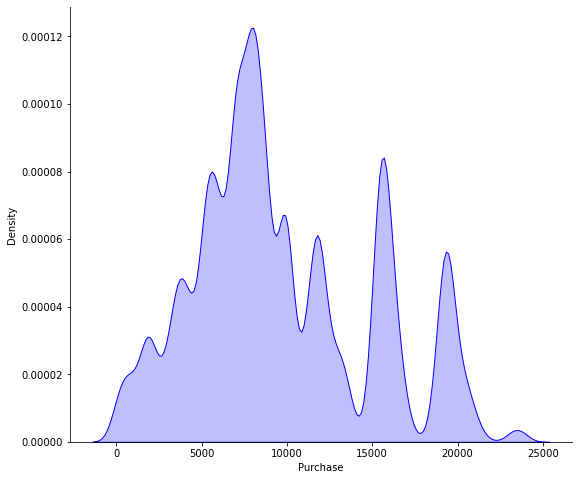

In [39]:
fig, ax = plt.subplots(figsize=(9, 8))
sns.kdeplot(city_c_purchase, fill=True, color='b')
sns.despine();

## Product Category

> Number of items in different section in All Category 

In [40]:
num_item_1 = train_set.groupby('Product_Category_1')['Product_ID'].nunique()
num_item_2 = train_set.groupby('Product_Category_2')['Product_ID'].nunique()

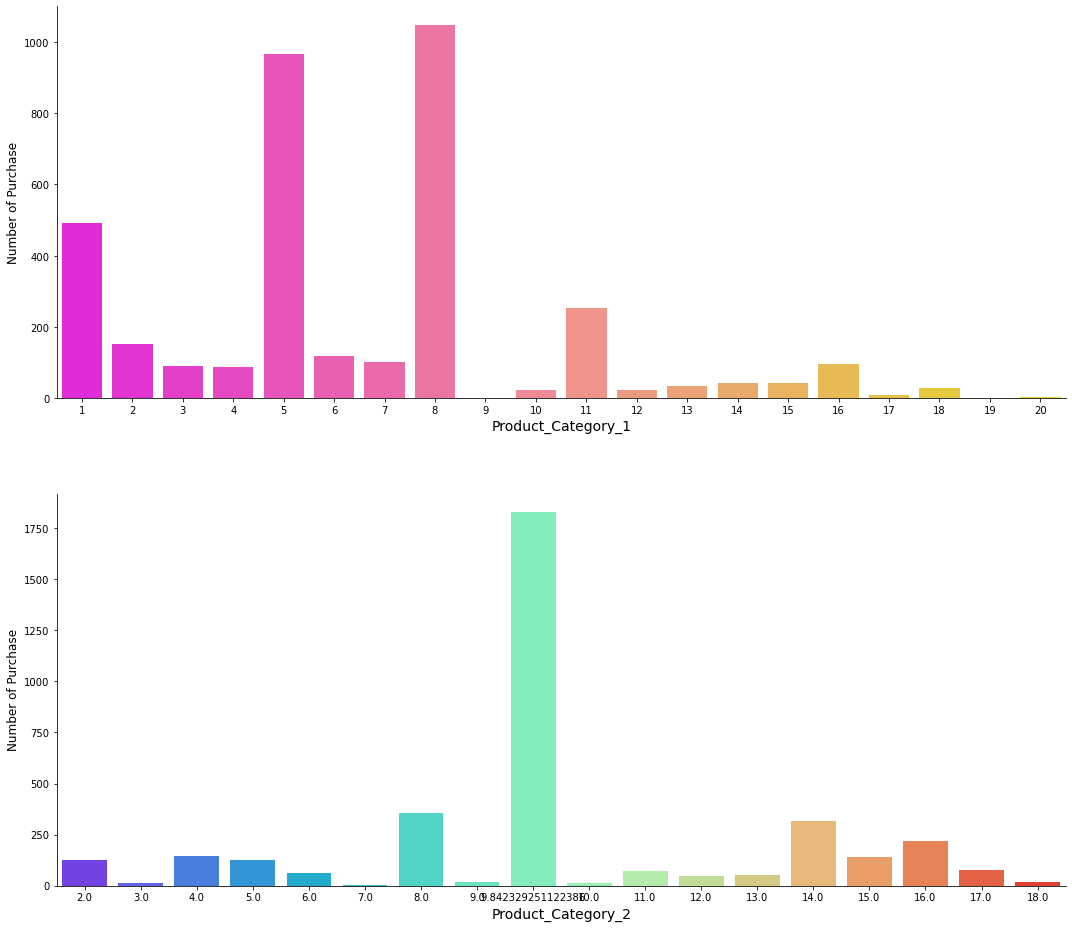

In [41]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.subplot(2,1,1)
sns.barplot(x=num_item_1.index, y=num_item_1, palette='spring')
plt.xlabel('Product_Category_1', fontsize=14)
plt.ylabel('Number of Purchase', fontsize=12)

plt.subplot(2,1,2)
sns.barplot(x=num_item_2.index, y=num_item_2, palette='rainbow')
plt.xlabel('Product_Category_2', fontsize=14)
plt.ylabel('Number of Purchase', fontsize=12)

fig.tight_layout(h_pad=6)
sns.despine();

The above plot also tells about sections in a category and how high their number of purchase.

> Which of the section in each category has most expensive goods?

In [42]:
mean_purchase1 = train_set.groupby('Product_Category_1')['Purchase'].mean()
mean_purchase2 = train_set.groupby('Product_Category_2')['Purchase'].mean()

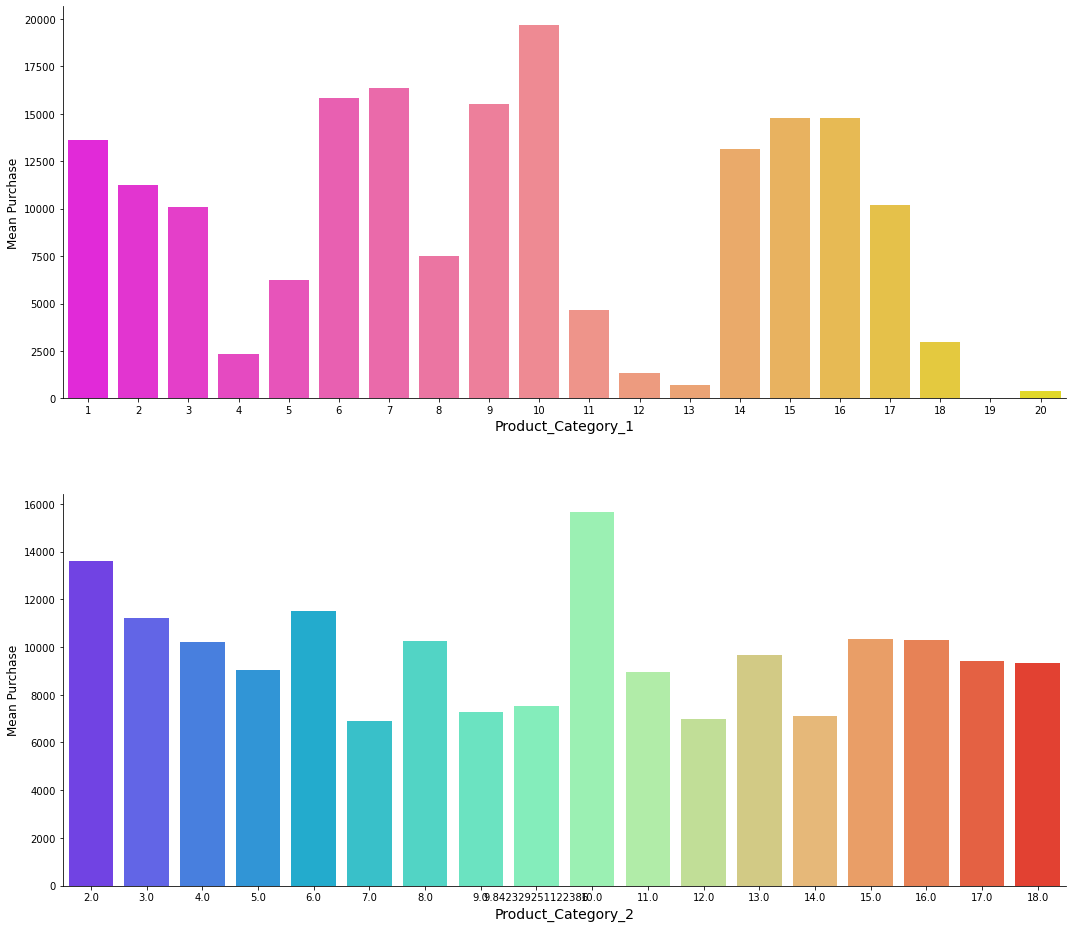

In [43]:
fig, ax = plt.subplots(figsize=(15, 13))
plt.subplot(2,1,1)
sns.barplot(x=mean_purchase1.index, y=mean_purchase1, palette='spring')
plt.xlabel('Product_Category_1', fontsize=14)
plt.ylabel('Mean Purchase', fontsize=12)

plt.subplot(2,1,2)
sns.barplot(x=mean_purchase2.index, y=mean_purchase2, palette='rainbow')
plt.xlabel('Product_Category_2', fontsize=14)
plt.ylabel('Mean Purchase', fontsize=12)

fig.tight_layout(h_pad=6)
sns.despine();

# Columns Selection and Preprocessing of the data

In [44]:
#Having a copy
train_df = train_set.copy()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

In [46]:
cols=[]

for col in train_df.columns:
    if train_df[col].dtypes=="object":
        cols.append(col)
        
temp_df=train_df[cols]   
temp_df.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [47]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [48]:
num_pipeline = Pipeline([
    ('impute',SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
    ])

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
class process_data(BaseEstimator, TransformerMixin):
    def __init__(self,split_data):
        self.split_data = split_data
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X.Stay_In_Current_City_Years = X.Stay_In_Current_City_Years.replace('4+', '4').astype('int64')
        X = X.drop('Product_Category_3', axis=1)
        num = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
        cat = X.select_dtypes(include='object').columns.to_list()
        cat.remove('Product_ID')
        num.remove('User_ID')
        if self.split_data:
            split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
            for train_index, test_index in split.split(X, X.Gender):
                #Splitting the data based on Gender to limit the biases while splitting
                strat_train_set = X.loc[train_index]
                strat_test_set = X.loc[test_index]
            y_train, y_test = strat_train_set.Purchase, strat_test_set.Purchase
            strat_train_set, strat_test_set = strat_train_set.drop('Purchase', axis=1),\
                                                strat_test_set.drop('Purchase', axis=1)
            num.remove('Purchase')
            full_pipeline = ColumnTransformer([
                ('num_col', num_pipeline, num),
                ('cat_col', OneHotEncoder(), cat)
            ])
            return (full_pipeline.fit_transform(strat_train_set),\
                    full_pipeline.fit_transform(strat_test_set)),(y_train, y_test)
        else:
            full_pipeline = ColumnTransformer([
                ('num_col', num_pipeline, num),
                ('cat_col', OneHotEncoder(), cat)
            ])
            return full_pipeline.fit_transform(X)

In [50]:
import joblib
process = {
    'training':process_data(split_data=True),
    'input_data': process_data(split_data=False)
}
joblib.dump(process,'process_data.pkl')

['process_data.pkl']

In [51]:
data_processing = joblib.load('process_data.pkl')

In [52]:
#Transform and split the training set
X, y = data_processing['training'].fit_transform(train_data)
X_train, X_test = X
y_train, y_test = y

In [53]:
X_test.shape

(110014, 17)

In [54]:
X_train.shape

(440054, 17)

# Training Different model and their Evaluations

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [56]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBRegressor':XGBRegressor(random_state=42),
    'catboost': CatBoostRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'GradientBoostingRegressor':GradientBoostingRegressor(random_state=42)
}

In [57]:
def models_eval(models, x, y):
    rmse_train, rmse_val,r2, model_name = [], [], [],[]
    for name, model in models.items():
        model_name.append(name) #Saving the name of model
        model.fit(x,y) #Fitting model on training set
        y_pred = model.predict(x) #Making prediction on already seen data
        rmse = round(mean_squared_error(y, y_pred, squared=False), 3) #Evaluation on training set
        rmse_train.append(rmse)
        r2score = round(r2_score(y, y_pred), 3) #Computing R2_score
        r2.append(r2score)
        # CrossValidation...
        scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
        rmse_scores = np.sqrt(-scores)
        rmse_val.append(rmse_scores.mean())
    # Create DataFrame for the models and their RMSE values
    eval_df = pd.DataFrame({'RMSE_Train_set':rmse_train, 'RMSE_Val':rmse_val, 'R2_Score':r2},index=model_name)
    return eval_df

In [58]:
eval_df = models_eval(models, X_train, y_train)

Learning rate set to 0.107116
0:	learn: 4754.3978717	total: 385ms	remaining: 6m 24s
1:	learn: 4527.5007616	total: 520ms	remaining: 4m 19s
2:	learn: 4338.1113124	total: 641ms	remaining: 3m 33s
3:	learn: 4186.5209561	total: 735ms	remaining: 3m 3s
4:	learn: 4029.4872712	total: 821ms	remaining: 2m 43s
5:	learn: 3902.8364433	total: 925ms	remaining: 2m 33s
6:	learn: 3786.2576201	total: 1.03s	remaining: 2m 25s
7:	learn: 3691.7684825	total: 1.2s	remaining: 2m 28s
8:	learn: 3604.4145779	total: 1.28s	remaining: 2m 21s
9:	learn: 3540.3683921	total: 1.38s	remaining: 2m 16s
10:	learn: 3474.8175856	total: 1.47s	remaining: 2m 12s
11:	learn: 3428.6362361	total: 1.57s	remaining: 2m 8s
12:	learn: 3377.5980670	total: 1.69s	remaining: 2m 8s
13:	learn: 3347.8550295	total: 1.83s	remaining: 2m 8s
14:	learn: 3312.5708827	total: 1.95s	remaining: 2m 7s
15:	learn: 3276.4076779	total: 2.06s	remaining: 2m 7s
16:	learn: 3247.1608225	total: 2.26s	remaining: 2m 10s
17:	learn: 3222.4292368	total: 2.36s	remaining: 2m 8

150:	learn: 2964.0383379	total: 14.4s	remaining: 1m 21s
151:	learn: 2963.6716975	total: 14.5s	remaining: 1m 20s
152:	learn: 2963.4955828	total: 14.6s	remaining: 1m 20s
153:	learn: 2963.2916534	total: 14.6s	remaining: 1m 20s
154:	learn: 2963.0163611	total: 14.7s	remaining: 1m 20s
155:	learn: 2962.6622575	total: 14.8s	remaining: 1m 20s
156:	learn: 2962.5149362	total: 14.9s	remaining: 1m 20s
157:	learn: 2962.0074936	total: 15s	remaining: 1m 19s
158:	learn: 2961.8552169	total: 15.1s	remaining: 1m 19s
159:	learn: 2961.6319137	total: 15.2s	remaining: 1m 19s
160:	learn: 2961.5079740	total: 15.3s	remaining: 1m 19s
161:	learn: 2961.1479818	total: 15.3s	remaining: 1m 19s
162:	learn: 2960.9974109	total: 15.4s	remaining: 1m 19s
163:	learn: 2960.6846760	total: 15.5s	remaining: 1m 18s
164:	learn: 2960.4969623	total: 15.5s	remaining: 1m 18s
165:	learn: 2960.4474359	total: 15.6s	remaining: 1m 18s
166:	learn: 2960.3440307	total: 15.7s	remaining: 1m 18s
167:	learn: 2960.1515216	total: 15.7s	remaining: 1

300:	learn: 2937.6591262	total: 26.8s	remaining: 1m 2s
301:	learn: 2937.4821804	total: 26.9s	remaining: 1m 2s
302:	learn: 2937.3093443	total: 26.9s	remaining: 1m 1s
303:	learn: 2937.2052416	total: 27s	remaining: 1m 1s
304:	learn: 2937.0084094	total: 27.1s	remaining: 1m 1s
305:	learn: 2936.9106923	total: 27.2s	remaining: 1m 1s
306:	learn: 2936.8284193	total: 27.3s	remaining: 1m 1s
307:	learn: 2936.6512251	total: 27.3s	remaining: 1m 1s
308:	learn: 2936.5544049	total: 27.4s	remaining: 1m 1s
309:	learn: 2936.5001285	total: 27.5s	remaining: 1m 1s
310:	learn: 2936.4524388	total: 27.5s	remaining: 1m 1s
311:	learn: 2936.3567235	total: 27.6s	remaining: 1m
312:	learn: 2936.2351186	total: 27.7s	remaining: 1m
313:	learn: 2936.1672410	total: 27.7s	remaining: 1m
314:	learn: 2935.9215453	total: 27.8s	remaining: 1m
315:	learn: 2935.7225696	total: 27.9s	remaining: 1m
316:	learn: 2935.5656188	total: 27.9s	remaining: 1m
317:	learn: 2935.4359757	total: 28s	remaining: 1m
318:	learn: 2935.3032108	total: 28.

452:	learn: 2922.0694273	total: 37.5s	remaining: 45.2s
453:	learn: 2921.9619739	total: 37.5s	remaining: 45.1s
454:	learn: 2921.8643890	total: 37.6s	remaining: 45s
455:	learn: 2921.6609329	total: 37.7s	remaining: 44.9s
456:	learn: 2921.6413043	total: 37.8s	remaining: 44.9s
457:	learn: 2921.5875817	total: 37.8s	remaining: 44.8s
458:	learn: 2921.4433760	total: 38s	remaining: 44.7s
459:	learn: 2921.3983261	total: 38.1s	remaining: 44.7s
460:	learn: 2921.3029674	total: 38.2s	remaining: 44.6s
461:	learn: 2921.1754114	total: 38.3s	remaining: 44.6s
462:	learn: 2921.1167154	total: 38.4s	remaining: 44.5s
463:	learn: 2921.0372756	total: 38.5s	remaining: 44.5s
464:	learn: 2920.9964317	total: 38.6s	remaining: 44.4s
465:	learn: 2920.9487821	total: 38.7s	remaining: 44.4s
466:	learn: 2920.8959224	total: 38.9s	remaining: 44.4s
467:	learn: 2920.8154486	total: 39s	remaining: 44.3s
468:	learn: 2920.6764407	total: 39.1s	remaining: 44.2s
469:	learn: 2920.6290500	total: 39.2s	remaining: 44.2s
470:	learn: 2920

605:	learn: 2911.2433283	total: 49.6s	remaining: 32.2s
606:	learn: 2911.2232316	total: 49.7s	remaining: 32.2s
607:	learn: 2911.2020147	total: 49.7s	remaining: 32.1s
608:	learn: 2911.1697870	total: 49.8s	remaining: 32s
609:	learn: 2911.0839037	total: 49.9s	remaining: 31.9s
610:	learn: 2911.0338581	total: 49.9s	remaining: 31.8s
611:	learn: 2910.9051341	total: 50s	remaining: 31.7s
612:	learn: 2910.8359969	total: 50.1s	remaining: 31.6s
613:	learn: 2910.7126757	total: 50.1s	remaining: 31.5s
614:	learn: 2910.6770812	total: 50.2s	remaining: 31.4s
615:	learn: 2910.6102786	total: 50.3s	remaining: 31.3s
616:	learn: 2910.5230647	total: 50.3s	remaining: 31.2s
617:	learn: 2910.4651292	total: 50.4s	remaining: 31.1s
618:	learn: 2910.3952040	total: 50.5s	remaining: 31.1s
619:	learn: 2910.3643445	total: 50.5s	remaining: 31s
620:	learn: 2910.3130460	total: 50.6s	remaining: 30.9s
621:	learn: 2910.2689440	total: 50.7s	remaining: 30.8s
622:	learn: 2910.2378786	total: 50.8s	remaining: 30.7s
623:	learn: 2910

756:	learn: 2902.3152321	total: 1m 2s	remaining: 20s
757:	learn: 2902.2755176	total: 1m 2s	remaining: 19.9s
758:	learn: 2902.2469510	total: 1m 2s	remaining: 19.8s
759:	learn: 2902.1835081	total: 1m 2s	remaining: 19.8s
760:	learn: 2902.1086146	total: 1m 2s	remaining: 19.7s
761:	learn: 2902.0591125	total: 1m 2s	remaining: 19.6s
762:	learn: 2902.0291283	total: 1m 2s	remaining: 19.6s
763:	learn: 2901.9862388	total: 1m 3s	remaining: 19.5s
764:	learn: 2901.9688310	total: 1m 3s	remaining: 19.4s
765:	learn: 2901.9364755	total: 1m 3s	remaining: 19.3s
766:	learn: 2901.9044318	total: 1m 3s	remaining: 19.2s
767:	learn: 2901.8283502	total: 1m 3s	remaining: 19.2s
768:	learn: 2901.7770565	total: 1m 3s	remaining: 19.1s
769:	learn: 2901.7537364	total: 1m 3s	remaining: 19s
770:	learn: 2901.7208969	total: 1m 3s	remaining: 19s
771:	learn: 2901.6655961	total: 1m 3s	remaining: 18.9s
772:	learn: 2901.6358571	total: 1m 4s	remaining: 18.8s
773:	learn: 2901.5836486	total: 1m 4s	remaining: 18.7s
774:	learn: 2901

906:	learn: 2894.9606594	total: 1m 15s	remaining: 7.79s
907:	learn: 2894.9186832	total: 1m 16s	remaining: 7.71s
908:	learn: 2894.8694903	total: 1m 16s	remaining: 7.62s
909:	learn: 2894.8348285	total: 1m 16s	remaining: 7.53s
910:	learn: 2894.7873344	total: 1m 16s	remaining: 7.45s
911:	learn: 2894.7351091	total: 1m 16s	remaining: 7.37s
912:	learn: 2894.7134766	total: 1m 16s	remaining: 7.28s
913:	learn: 2894.6532231	total: 1m 16s	remaining: 7.19s
914:	learn: 2894.6214879	total: 1m 16s	remaining: 7.11s
915:	learn: 2894.5713518	total: 1m 16s	remaining: 7.02s
916:	learn: 2894.5200128	total: 1m 16s	remaining: 6.94s
917:	learn: 2894.4719395	total: 1m 16s	remaining: 6.86s
918:	learn: 2894.3743829	total: 1m 16s	remaining: 6.77s
919:	learn: 2894.3465790	total: 1m 16s	remaining: 6.69s
920:	learn: 2894.2957595	total: 1m 16s	remaining: 6.6s
921:	learn: 2894.2587914	total: 1m 17s	remaining: 6.52s
922:	learn: 2894.1817373	total: 1m 17s	remaining: 6.43s
923:	learn: 2894.1344742	total: 1m 17s	remaining:

57:	learn: 3009.9719023	total: 3.32s	remaining: 53.9s
58:	learn: 3009.0777240	total: 3.37s	remaining: 53.8s
59:	learn: 3008.2641855	total: 3.43s	remaining: 53.7s
60:	learn: 3007.4125606	total: 3.48s	remaining: 53.6s
61:	learn: 3005.5053868	total: 3.53s	remaining: 53.5s
62:	learn: 3004.8254092	total: 3.6s	remaining: 53.5s
63:	learn: 3004.2187364	total: 3.65s	remaining: 53.4s
64:	learn: 3002.6612541	total: 3.7s	remaining: 53.3s
65:	learn: 3001.8209911	total: 3.76s	remaining: 53.2s
66:	learn: 3001.3192494	total: 3.81s	remaining: 53.1s
67:	learn: 3000.0746573	total: 3.87s	remaining: 53s
68:	learn: 2998.8628326	total: 3.92s	remaining: 52.8s
69:	learn: 2998.1859422	total: 3.99s	remaining: 53s
70:	learn: 2997.4525285	total: 4.04s	remaining: 52.9s
71:	learn: 2996.6549719	total: 4.11s	remaining: 53s
72:	learn: 2995.9832517	total: 4.17s	remaining: 53s
73:	learn: 2995.4412505	total: 4.23s	remaining: 52.9s
74:	learn: 2994.7976305	total: 4.29s	remaining: 52.9s
75:	learn: 2993.9364489	total: 4.34s	r

210:	learn: 2950.9421940	total: 12.6s	remaining: 47s
211:	learn: 2950.7729654	total: 12.6s	remaining: 47s
212:	learn: 2950.5427725	total: 12.7s	remaining: 46.9s
213:	learn: 2950.4288730	total: 12.7s	remaining: 46.8s
214:	learn: 2950.3680201	total: 12.8s	remaining: 46.7s
215:	learn: 2950.1103322	total: 12.9s	remaining: 46.7s
216:	learn: 2950.0446030	total: 12.9s	remaining: 46.6s
217:	learn: 2949.7684444	total: 13s	remaining: 46.5s
218:	learn: 2949.5379066	total: 13s	remaining: 46.4s
219:	learn: 2949.2922162	total: 13.1s	remaining: 46.3s
220:	learn: 2949.1507422	total: 13.1s	remaining: 46.2s
221:	learn: 2949.0147688	total: 13.2s	remaining: 46.2s
222:	learn: 2948.9140461	total: 13.2s	remaining: 46.1s
223:	learn: 2948.7575529	total: 13.3s	remaining: 46s
224:	learn: 2948.6793521	total: 13.3s	remaining: 46s
225:	learn: 2948.5400116	total: 13.4s	remaining: 45.9s
226:	learn: 2948.3039554	total: 13.5s	remaining: 46s
227:	learn: 2948.0814882	total: 13.6s	remaining: 46s
228:	learn: 2947.9691825	t

364:	learn: 2928.6234727	total: 20.9s	remaining: 36.3s
365:	learn: 2928.4463627	total: 20.9s	remaining: 36.3s
366:	learn: 2928.3115657	total: 21s	remaining: 36.2s
367:	learn: 2928.2219757	total: 21.1s	remaining: 36.2s
368:	learn: 2928.1634612	total: 21.1s	remaining: 36.1s
369:	learn: 2927.9367426	total: 21.2s	remaining: 36s
370:	learn: 2927.7921089	total: 21.2s	remaining: 35.9s
371:	learn: 2927.7109877	total: 21.3s	remaining: 35.9s
372:	learn: 2927.6465630	total: 21.3s	remaining: 35.9s
373:	learn: 2927.4123807	total: 21.4s	remaining: 35.8s
374:	learn: 2927.3208382	total: 21.4s	remaining: 35.7s
375:	learn: 2927.1553966	total: 21.5s	remaining: 35.6s
376:	learn: 2926.9044230	total: 21.5s	remaining: 35.6s
377:	learn: 2926.8558889	total: 21.6s	remaining: 35.5s
378:	learn: 2926.8189712	total: 21.6s	remaining: 35.4s
379:	learn: 2926.7410227	total: 21.7s	remaining: 35.4s
380:	learn: 2926.6053608	total: 21.7s	remaining: 35.3s
381:	learn: 2926.4446297	total: 21.8s	remaining: 35.2s
382:	learn: 29

518:	learn: 2913.6661362	total: 28.7s	remaining: 26.6s
519:	learn: 2913.5588309	total: 28.8s	remaining: 26.6s
520:	learn: 2913.5097301	total: 28.8s	remaining: 26.5s
521:	learn: 2913.4316153	total: 28.9s	remaining: 26.4s
522:	learn: 2913.3757850	total: 28.9s	remaining: 26.4s
523:	learn: 2913.2926188	total: 29s	remaining: 26.3s
524:	learn: 2913.2391345	total: 29s	remaining: 26.3s
525:	learn: 2913.1437585	total: 29.1s	remaining: 26.2s
526:	learn: 2913.1110924	total: 29.1s	remaining: 26.1s
527:	learn: 2913.0469007	total: 29.2s	remaining: 26.1s
528:	learn: 2912.9818732	total: 29.2s	remaining: 26s
529:	learn: 2912.9497750	total: 29.3s	remaining: 25.9s
530:	learn: 2912.8829149	total: 29.3s	remaining: 25.9s
531:	learn: 2912.8702153	total: 29.3s	remaining: 25.8s
532:	learn: 2912.7760132	total: 29.4s	remaining: 25.8s
533:	learn: 2912.6465829	total: 29.5s	remaining: 25.7s
534:	learn: 2912.5871597	total: 29.5s	remaining: 25.7s
535:	learn: 2912.5359579	total: 29.6s	remaining: 25.6s
536:	learn: 2912

673:	learn: 2902.8765440	total: 36.3s	remaining: 17.6s
674:	learn: 2902.8171725	total: 36.4s	remaining: 17.5s
675:	learn: 2902.7982596	total: 36.4s	remaining: 17.5s
676:	learn: 2902.7494326	total: 36.5s	remaining: 17.4s
677:	learn: 2902.7241478	total: 36.5s	remaining: 17.4s
678:	learn: 2902.6863142	total: 36.6s	remaining: 17.3s
679:	learn: 2902.5797051	total: 36.6s	remaining: 17.2s
680:	learn: 2902.5533174	total: 36.7s	remaining: 17.2s
681:	learn: 2902.5045698	total: 36.7s	remaining: 17.1s
682:	learn: 2902.4765882	total: 36.8s	remaining: 17.1s
683:	learn: 2902.4032531	total: 36.8s	remaining: 17s
684:	learn: 2902.3773830	total: 36.9s	remaining: 17s
685:	learn: 2902.2941520	total: 37s	remaining: 16.9s
686:	learn: 2902.2351957	total: 37s	remaining: 16.9s
687:	learn: 2902.1742845	total: 37.1s	remaining: 16.8s
688:	learn: 2902.1180029	total: 37.1s	remaining: 16.8s
689:	learn: 2902.0509796	total: 37.2s	remaining: 16.7s
690:	learn: 2901.9892038	total: 37.2s	remaining: 16.6s
691:	learn: 2901.9

824:	learn: 2893.8586263	total: 43.8s	remaining: 9.28s
825:	learn: 2893.7813248	total: 43.8s	remaining: 9.23s
826:	learn: 2893.7294969	total: 43.9s	remaining: 9.17s
827:	learn: 2893.6577587	total: 43.9s	remaining: 9.12s
828:	learn: 2893.6117692	total: 43.9s	remaining: 9.06s
829:	learn: 2893.5733517	total: 44s	remaining: 9.01s
830:	learn: 2893.5428908	total: 44s	remaining: 8.96s
831:	learn: 2893.4766795	total: 44.1s	remaining: 8.9s
832:	learn: 2893.3926738	total: 44.1s	remaining: 8.85s
833:	learn: 2893.3211721	total: 44.2s	remaining: 8.79s
834:	learn: 2893.2563524	total: 44.2s	remaining: 8.74s
835:	learn: 2893.2056088	total: 44.3s	remaining: 8.69s
836:	learn: 2893.1683739	total: 44.4s	remaining: 8.64s
837:	learn: 2893.0708854	total: 44.4s	remaining: 8.58s
838:	learn: 2893.0113033	total: 44.5s	remaining: 8.53s
839:	learn: 2892.9528476	total: 44.5s	remaining: 8.48s
840:	learn: 2892.9255332	total: 44.5s	remaining: 8.42s
841:	learn: 2892.9098149	total: 44.6s	remaining: 8.37s
842:	learn: 289

974:	learn: 2886.5103829	total: 51.5s	remaining: 1.32s
975:	learn: 2886.4653338	total: 51.5s	remaining: 1.27s
976:	learn: 2886.4211257	total: 51.6s	remaining: 1.21s
977:	learn: 2886.3636383	total: 51.6s	remaining: 1.16s
978:	learn: 2886.3111695	total: 51.6s	remaining: 1.11s
979:	learn: 2886.2641667	total: 51.7s	remaining: 1.05s
980:	learn: 2886.2137818	total: 51.8s	remaining: 1s
981:	learn: 2886.1535081	total: 51.8s	remaining: 950ms
982:	learn: 2886.1138702	total: 51.9s	remaining: 897ms
983:	learn: 2886.0699310	total: 51.9s	remaining: 844ms
984:	learn: 2886.0177014	total: 52s	remaining: 792ms
985:	learn: 2885.9849685	total: 52s	remaining: 739ms
986:	learn: 2885.8982636	total: 52.1s	remaining: 686ms
987:	learn: 2885.8801915	total: 52.1s	remaining: 633ms
988:	learn: 2885.8617269	total: 52.2s	remaining: 580ms
989:	learn: 2885.8282153	total: 52.2s	remaining: 527ms
990:	learn: 2885.8035074	total: 52.3s	remaining: 475ms
991:	learn: 2885.7757849	total: 52.3s	remaining: 422ms
992:	learn: 2885.

126:	learn: 2974.8229648	total: 6.2s	remaining: 42.6s
127:	learn: 2974.1590973	total: 6.25s	remaining: 42.6s
128:	learn: 2974.0414167	total: 6.29s	remaining: 42.5s
129:	learn: 2973.8814558	total: 6.34s	remaining: 42.4s
130:	learn: 2973.1497313	total: 6.39s	remaining: 42.4s
131:	learn: 2972.6574968	total: 6.44s	remaining: 42.3s
132:	learn: 2972.3468879	total: 6.48s	remaining: 42.3s
133:	learn: 2972.1013203	total: 6.53s	remaining: 42.2s
134:	learn: 2971.5993940	total: 6.58s	remaining: 42.1s
135:	learn: 2971.1533977	total: 6.63s	remaining: 42.1s
136:	learn: 2970.6201858	total: 6.7s	remaining: 42.2s
137:	learn: 2970.3651812	total: 6.76s	remaining: 42.2s
138:	learn: 2970.1818731	total: 6.82s	remaining: 42.3s
139:	learn: 2969.9147374	total: 6.89s	remaining: 42.3s
140:	learn: 2969.8145529	total: 6.95s	remaining: 42.4s
141:	learn: 2969.6286538	total: 7.02s	remaining: 42.4s
142:	learn: 2969.4326618	total: 7.14s	remaining: 42.8s
143:	learn: 2969.0364016	total: 7.22s	remaining: 42.9s
144:	learn: 

278:	learn: 2941.2982287	total: 14.9s	remaining: 38.4s
279:	learn: 2941.2164873	total: 14.9s	remaining: 38.3s
280:	learn: 2941.1382757	total: 15s	remaining: 38.3s
281:	learn: 2941.0628136	total: 15s	remaining: 38.2s
282:	learn: 2940.9643895	total: 15s	remaining: 38.1s
283:	learn: 2940.8917293	total: 15.1s	remaining: 38.1s
284:	learn: 2940.8202913	total: 15.1s	remaining: 38s
285:	learn: 2940.5523229	total: 15.2s	remaining: 37.9s
286:	learn: 2940.3689781	total: 15.2s	remaining: 37.9s
287:	learn: 2940.1593593	total: 15.3s	remaining: 37.8s
288:	learn: 2940.1094996	total: 15.3s	remaining: 37.7s
289:	learn: 2939.9940072	total: 15.4s	remaining: 37.7s
290:	learn: 2939.8931439	total: 15.4s	remaining: 37.6s
291:	learn: 2939.5009070	total: 15.5s	remaining: 37.5s
292:	learn: 2939.4511277	total: 15.5s	remaining: 37.5s
293:	learn: 2939.3557519	total: 15.6s	remaining: 37.5s
294:	learn: 2939.0561117	total: 15.7s	remaining: 37.4s
295:	learn: 2938.9683404	total: 15.7s	remaining: 37.4s
296:	learn: 2938.7

429:	learn: 2922.4968530	total: 23.6s	remaining: 31.3s
430:	learn: 2922.4277926	total: 23.7s	remaining: 31.3s
431:	learn: 2922.2836660	total: 23.7s	remaining: 31.2s
432:	learn: 2922.1891293	total: 23.8s	remaining: 31.1s
433:	learn: 2922.0930836	total: 23.8s	remaining: 31.1s
434:	learn: 2922.0073740	total: 23.9s	remaining: 31s
435:	learn: 2921.9094068	total: 23.9s	remaining: 30.9s
436:	learn: 2921.8645733	total: 24s	remaining: 30.9s
437:	learn: 2921.8030064	total: 24s	remaining: 30.8s
438:	learn: 2921.7360780	total: 24.1s	remaining: 30.7s
439:	learn: 2921.6649621	total: 24.1s	remaining: 30.7s
440:	learn: 2921.5751096	total: 24.2s	remaining: 30.6s
441:	learn: 2921.5234552	total: 24.2s	remaining: 30.6s
442:	learn: 2921.5063719	total: 24.3s	remaining: 30.5s
443:	learn: 2921.4555455	total: 24.4s	remaining: 30.5s
444:	learn: 2921.3481803	total: 24.4s	remaining: 30.5s
445:	learn: 2921.2903948	total: 24.5s	remaining: 30.4s
446:	learn: 2921.1506857	total: 24.5s	remaining: 30.4s
447:	learn: 2921

581:	learn: 2909.6624892	total: 31.2s	remaining: 22.4s
582:	learn: 2909.6181767	total: 31.3s	remaining: 22.4s
583:	learn: 2909.5350069	total: 31.3s	remaining: 22.3s
584:	learn: 2909.4331805	total: 31.3s	remaining: 22.2s
585:	learn: 2909.3968519	total: 31.4s	remaining: 22.2s
586:	learn: 2909.3001883	total: 31.4s	remaining: 22.1s
587:	learn: 2909.2538339	total: 31.5s	remaining: 22.1s
588:	learn: 2909.2122501	total: 31.5s	remaining: 22s
589:	learn: 2909.1388148	total: 31.6s	remaining: 21.9s
590:	learn: 2909.0177740	total: 31.6s	remaining: 21.9s
591:	learn: 2908.9490837	total: 31.7s	remaining: 21.8s
592:	learn: 2908.8647068	total: 31.7s	remaining: 21.8s
593:	learn: 2908.7737146	total: 31.8s	remaining: 21.7s
594:	learn: 2908.7461704	total: 31.9s	remaining: 21.7s
595:	learn: 2908.7030310	total: 31.9s	remaining: 21.6s
596:	learn: 2908.6756388	total: 31.9s	remaining: 21.6s
597:	learn: 2908.5917901	total: 32s	remaining: 21.5s
598:	learn: 2908.5439154	total: 32s	remaining: 21.4s
599:	learn: 2908

733:	learn: 2900.4528801	total: 38.7s	remaining: 14s
734:	learn: 2900.4149904	total: 38.8s	remaining: 14s
735:	learn: 2900.3623702	total: 38.8s	remaining: 13.9s
736:	learn: 2900.2758215	total: 38.9s	remaining: 13.9s
737:	learn: 2900.2351250	total: 38.9s	remaining: 13.8s
738:	learn: 2900.1561832	total: 39s	remaining: 13.8s
739:	learn: 2900.0756000	total: 39s	remaining: 13.7s
740:	learn: 2900.0256631	total: 39.1s	remaining: 13.7s
741:	learn: 2899.9740927	total: 39.1s	remaining: 13.6s
742:	learn: 2899.8825373	total: 39.2s	remaining: 13.6s
743:	learn: 2899.7884698	total: 39.2s	remaining: 13.5s
744:	learn: 2899.7107183	total: 39.3s	remaining: 13.4s
745:	learn: 2899.5710690	total: 39.3s	remaining: 13.4s
746:	learn: 2899.4409045	total: 39.4s	remaining: 13.3s
747:	learn: 2899.4043280	total: 39.4s	remaining: 13.3s
748:	learn: 2899.3417963	total: 39.5s	remaining: 13.2s
749:	learn: 2899.2091362	total: 39.5s	remaining: 13.2s
750:	learn: 2899.1466538	total: 39.6s	remaining: 13.1s
751:	learn: 2899.0

885:	learn: 2892.1638946	total: 46.1s	remaining: 5.94s
886:	learn: 2892.1128710	total: 46.2s	remaining: 5.88s
887:	learn: 2892.0624964	total: 46.2s	remaining: 5.83s
888:	learn: 2892.0013798	total: 46.3s	remaining: 5.78s
889:	learn: 2891.9578998	total: 46.3s	remaining: 5.73s
890:	learn: 2891.9263955	total: 46.4s	remaining: 5.67s
891:	learn: 2891.8942912	total: 46.4s	remaining: 5.62s
892:	learn: 2891.8256412	total: 46.5s	remaining: 5.57s
893:	learn: 2891.7911386	total: 46.5s	remaining: 5.52s
894:	learn: 2891.7476878	total: 46.6s	remaining: 5.47s
895:	learn: 2891.7174733	total: 46.7s	remaining: 5.42s
896:	learn: 2891.6500722	total: 46.7s	remaining: 5.36s
897:	learn: 2891.5974387	total: 46.7s	remaining: 5.31s
898:	learn: 2891.5467784	total: 46.8s	remaining: 5.26s
899:	learn: 2891.4623680	total: 46.8s	remaining: 5.21s
900:	learn: 2891.4323767	total: 46.9s	remaining: 5.15s
901:	learn: 2891.3763578	total: 46.9s	remaining: 5.1s
902:	learn: 2891.3465516	total: 47s	remaining: 5.05s
903:	learn: 2

37:	learn: 3051.9073220	total: 1.86s	remaining: 47.1s
38:	learn: 3045.5914440	total: 1.9s	remaining: 46.9s
39:	learn: 3043.1169889	total: 1.95s	remaining: 46.7s
40:	learn: 3041.6802601	total: 1.99s	remaining: 46.6s
41:	learn: 3036.6185476	total: 2.04s	remaining: 46.5s
42:	learn: 3035.3653765	total: 2.09s	remaining: 46.5s
43:	learn: 3033.8625943	total: 2.14s	remaining: 46.5s
44:	learn: 3032.3233160	total: 2.19s	remaining: 46.4s
45:	learn: 3031.0302013	total: 2.23s	remaining: 46.4s
46:	learn: 3030.0750709	total: 2.28s	remaining: 46.3s
47:	learn: 3026.3554601	total: 2.35s	remaining: 46.7s
48:	learn: 3025.0137726	total: 2.42s	remaining: 46.9s
49:	learn: 3023.2942258	total: 2.46s	remaining: 46.8s
50:	learn: 3022.4582606	total: 2.51s	remaining: 46.8s
51:	learn: 3021.6123773	total: 2.56s	remaining: 46.7s
52:	learn: 3020.2677409	total: 2.61s	remaining: 46.6s
53:	learn: 3018.5597014	total: 2.65s	remaining: 46.5s
54:	learn: 3017.4710500	total: 2.7s	remaining: 46.4s
55:	learn: 3016.9110641	total:

189:	learn: 2957.4283363	total: 9.37s	remaining: 39.9s
190:	learn: 2957.3262151	total: 9.41s	remaining: 39.9s
191:	learn: 2957.2254255	total: 9.47s	remaining: 39.8s
192:	learn: 2957.0970144	total: 9.51s	remaining: 39.8s
193:	learn: 2956.9735289	total: 9.56s	remaining: 39.7s
194:	learn: 2956.9409037	total: 9.6s	remaining: 39.6s
195:	learn: 2956.8280973	total: 9.65s	remaining: 39.6s
196:	learn: 2956.7218371	total: 9.7s	remaining: 39.5s
197:	learn: 2956.6744002	total: 9.74s	remaining: 39.4s
198:	learn: 2956.5146540	total: 9.83s	remaining: 39.6s
199:	learn: 2956.2866509	total: 9.88s	remaining: 39.5s
200:	learn: 2955.7918664	total: 9.93s	remaining: 39.5s
201:	learn: 2955.3528231	total: 9.98s	remaining: 39.4s
202:	learn: 2955.1158519	total: 10s	remaining: 39.4s
203:	learn: 2954.9888845	total: 10.1s	remaining: 39.3s
204:	learn: 2954.8061957	total: 10.1s	remaining: 39.3s
205:	learn: 2954.4947501	total: 10.2s	remaining: 39.2s
206:	learn: 2954.1337324	total: 10.2s	remaining: 39.2s
207:	learn: 29

343:	learn: 2932.7069725	total: 17s	remaining: 32.4s
344:	learn: 2932.5943654	total: 17.1s	remaining: 32.4s
345:	learn: 2932.5321942	total: 17.1s	remaining: 32.3s
346:	learn: 2932.3766420	total: 17.2s	remaining: 32.3s
347:	learn: 2932.2853028	total: 17.2s	remaining: 32.2s
348:	learn: 2932.2174119	total: 17.3s	remaining: 32.2s
349:	learn: 2932.1308439	total: 17.3s	remaining: 32.2s
350:	learn: 2932.0717187	total: 17.4s	remaining: 32.1s
351:	learn: 2931.8553089	total: 17.4s	remaining: 32.1s
352:	learn: 2931.8106337	total: 17.5s	remaining: 32s
353:	learn: 2931.7582660	total: 17.5s	remaining: 32s
354:	learn: 2931.6080793	total: 17.6s	remaining: 31.9s
355:	learn: 2931.5289121	total: 17.6s	remaining: 31.9s
356:	learn: 2931.4726918	total: 17.7s	remaining: 31.8s
357:	learn: 2931.4581096	total: 17.7s	remaining: 31.8s
358:	learn: 2931.4045306	total: 17.8s	remaining: 31.7s
359:	learn: 2931.2262583	total: 17.8s	remaining: 31.6s
360:	learn: 2931.1477271	total: 17.8s	remaining: 31.6s
361:	learn: 2931

496:	learn: 2917.5038563	total: 24.6s	remaining: 24.9s
497:	learn: 2917.4221781	total: 24.6s	remaining: 24.8s
498:	learn: 2917.3591695	total: 24.7s	remaining: 24.8s
499:	learn: 2917.3151873	total: 24.7s	remaining: 24.7s
500:	learn: 2917.1754021	total: 24.8s	remaining: 24.7s
501:	learn: 2917.1206282	total: 24.8s	remaining: 24.6s
502:	learn: 2917.0533647	total: 24.9s	remaining: 24.6s
503:	learn: 2916.9328358	total: 24.9s	remaining: 24.5s
504:	learn: 2916.8643556	total: 25s	remaining: 24.5s
505:	learn: 2916.8173656	total: 25s	remaining: 24.4s
506:	learn: 2916.6795939	total: 25.1s	remaining: 24.4s
507:	learn: 2916.6371499	total: 25.1s	remaining: 24.3s
508:	learn: 2916.5730995	total: 25.2s	remaining: 24.3s
509:	learn: 2916.4492367	total: 25.2s	remaining: 24.2s
510:	learn: 2916.3601879	total: 25.3s	remaining: 24.2s
511:	learn: 2916.2673065	total: 25.3s	remaining: 24.1s
512:	learn: 2916.1257780	total: 25.4s	remaining: 24.1s
513:	learn: 2916.0813110	total: 25.4s	remaining: 24s
514:	learn: 2916

647:	learn: 2906.9878389	total: 34.1s	remaining: 18.5s
648:	learn: 2906.9092439	total: 34.2s	remaining: 18.5s
649:	learn: 2906.8125281	total: 34.3s	remaining: 18.5s
650:	learn: 2906.6931900	total: 34.4s	remaining: 18.4s
651:	learn: 2906.6590979	total: 34.5s	remaining: 18.4s
652:	learn: 2906.5878460	total: 34.5s	remaining: 18.4s
653:	learn: 2906.5271904	total: 34.6s	remaining: 18.3s
654:	learn: 2906.4635910	total: 34.7s	remaining: 18.3s
655:	learn: 2906.3873099	total: 34.7s	remaining: 18.2s
656:	learn: 2906.3591848	total: 34.8s	remaining: 18.2s
657:	learn: 2906.2855406	total: 34.9s	remaining: 18.1s
658:	learn: 2906.2349109	total: 35s	remaining: 18.1s
659:	learn: 2906.1913038	total: 35s	remaining: 18s
660:	learn: 2906.1443329	total: 35.1s	remaining: 18s
661:	learn: 2906.0938418	total: 35.2s	remaining: 18s
662:	learn: 2905.9200508	total: 35.2s	remaining: 17.9s
663:	learn: 2905.8887025	total: 35.3s	remaining: 17.9s
664:	learn: 2905.7908013	total: 35.4s	remaining: 17.8s
665:	learn: 2905.732

801:	learn: 2897.9896427	total: 44.5s	remaining: 11s
802:	learn: 2897.7830239	total: 44.6s	remaining: 10.9s
803:	learn: 2897.7519546	total: 44.6s	remaining: 10.9s
804:	learn: 2897.7154004	total: 44.7s	remaining: 10.8s
805:	learn: 2897.6480600	total: 44.7s	remaining: 10.8s
806:	learn: 2897.6113859	total: 44.7s	remaining: 10.7s
807:	learn: 2897.5752072	total: 44.8s	remaining: 10.6s
808:	learn: 2897.5301381	total: 44.8s	remaining: 10.6s
809:	learn: 2897.4998513	total: 44.9s	remaining: 10.5s
810:	learn: 2897.3886975	total: 44.9s	remaining: 10.5s
811:	learn: 2897.2986034	total: 45s	remaining: 10.4s
812:	learn: 2897.2279389	total: 45s	remaining: 10.4s
813:	learn: 2897.1986729	total: 45.1s	remaining: 10.3s
814:	learn: 2897.1483537	total: 45.1s	remaining: 10.2s
815:	learn: 2897.1236068	total: 45.2s	remaining: 10.2s
816:	learn: 2897.0229099	total: 45.2s	remaining: 10.1s
817:	learn: 2896.9901012	total: 45.3s	remaining: 10.1s
818:	learn: 2896.9180958	total: 45.4s	remaining: 10s
819:	learn: 2896.8

953:	learn: 2890.1045467	total: 52s	remaining: 2.51s
954:	learn: 2890.0334697	total: 52s	remaining: 2.45s
955:	learn: 2890.0063340	total: 52.1s	remaining: 2.4s
956:	learn: 2889.9489349	total: 52.1s	remaining: 2.34s
957:	learn: 2889.9072404	total: 52.2s	remaining: 2.29s
958:	learn: 2889.8752936	total: 52.2s	remaining: 2.23s
959:	learn: 2889.8185118	total: 52.3s	remaining: 2.18s
960:	learn: 2889.7993843	total: 52.3s	remaining: 2.12s
961:	learn: 2889.7494428	total: 52.4s	remaining: 2.07s
962:	learn: 2889.7359183	total: 52.4s	remaining: 2.01s
963:	learn: 2889.7151707	total: 52.5s	remaining: 1.96s
964:	learn: 2889.6926279	total: 52.5s	remaining: 1.9s
965:	learn: 2889.6570752	total: 52.6s	remaining: 1.85s
966:	learn: 2889.6205502	total: 52.6s	remaining: 1.79s
967:	learn: 2889.5537439	total: 52.7s	remaining: 1.74s
968:	learn: 2889.5252330	total: 52.8s	remaining: 1.69s
969:	learn: 2889.4840178	total: 52.9s	remaining: 1.64s
970:	learn: 2889.4510610	total: 52.9s	remaining: 1.58s
971:	learn: 2889

In [59]:
eval_df = eval_df.sort_values(by=["RMSE_Val"])
eval_df.to_pickle('Model_evaluation.pkl')
pd.read_pickle('Model_evaluation.pkl')

,RMSE_Train_set,RMSE_Val,R2_Score
catboost,2890.767,2918.575559,0.669
XGBRegressor,2887.412,2919.099150,0.669
GradientBoostingRegressor,2996.293,2997.723506,0.644
RandomForest,2550.213,3053.256333,0.742
DecisionTree,2525.183,3234.521536,0.747
AdaBoostRegressor,3685.679,3714.847775,0.461
Ridge,4690.134,4690.309763,0.128
Lasso,4690.146,4690.314656,0.128
LinearRegression,4690.140,4690.320699,0.128
SGDRegressor,4692.094,4691.904136,0.127


# Fine-Tuning the best model

**Selected best models:**

- Catboost
- XGBRegressor

> **XGBRegressor**

In [60]:
xgbr = XGBRegressor(max_depth = 7, learning_rate = 0.1, n_estimators = 1000, random_state =42)
scores = cross_val_score(xgbr, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
rmse_scores = np.sqrt(-scores)

In [61]:
print(f'RMSE:{rmse_scores.mean()}')

RMSE:2906.9502814292136


> **Catboost**

In [62]:
cat = CatBoostRegressor(max_depth=7, learning_rate=0.1, n_estimators=1500, random_state=42)
scores = cross_val_score(cat, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
cat_rmse_scores = np.sqrt(-scores)

0:	learn: 4754.7497740	total: 52.6ms	remaining: 1m 18s
1:	learn: 4525.8767118	total: 101ms	remaining: 1m 15s
2:	learn: 4327.4435736	total: 149ms	remaining: 1m 14s
3:	learn: 4157.7879063	total: 216ms	remaining: 1m 20s
4:	learn: 3993.6295836	total: 270ms	remaining: 1m 20s
5:	learn: 3861.8754066	total: 326ms	remaining: 1m 21s
6:	learn: 3751.3847646	total: 375ms	remaining: 1m 20s
7:	learn: 3641.1781764	total: 422ms	remaining: 1m 18s
8:	learn: 3563.2088522	total: 470ms	remaining: 1m 17s
9:	learn: 3499.3835593	total: 520ms	remaining: 1m 17s
10:	learn: 3444.8118268	total: 596ms	remaining: 1m 20s
11:	learn: 3379.7079366	total: 654ms	remaining: 1m 21s
12:	learn: 3329.4080909	total: 698ms	remaining: 1m 19s
13:	learn: 3297.9261964	total: 749ms	remaining: 1m 19s
14:	learn: 3264.4437205	total: 801ms	remaining: 1m 19s
15:	learn: 3225.5015899	total: 857ms	remaining: 1m 19s
16:	learn: 3202.8310093	total: 907ms	remaining: 1m 19s
17:	learn: 3175.0440675	total: 954ms	remaining: 1m 18s
18:	learn: 3161.191

149:	learn: 2951.7750607	total: 9.69s	remaining: 1m 27s
150:	learn: 2951.4862023	total: 9.88s	remaining: 1m 28s
151:	learn: 2951.3033804	total: 9.99s	remaining: 1m 28s
152:	learn: 2951.0722835	total: 10.1s	remaining: 1m 28s
153:	learn: 2950.6435892	total: 10.2s	remaining: 1m 29s
154:	learn: 2950.3823308	total: 10.3s	remaining: 1m 29s
155:	learn: 2949.6741665	total: 10.4s	remaining: 1m 29s
156:	learn: 2949.2881124	total: 10.5s	remaining: 1m 29s
157:	learn: 2948.8031832	total: 10.6s	remaining: 1m 30s
158:	learn: 2948.6375889	total: 10.7s	remaining: 1m 30s
159:	learn: 2948.3134724	total: 10.8s	remaining: 1m 30s
160:	learn: 2948.0927562	total: 10.9s	remaining: 1m 31s
161:	learn: 2947.9258921	total: 11.1s	remaining: 1m 31s
162:	learn: 2947.8111653	total: 11.1s	remaining: 1m 31s
163:	learn: 2947.6576737	total: 11.2s	remaining: 1m 31s
164:	learn: 2947.2871171	total: 11.3s	remaining: 1m 31s
165:	learn: 2947.2102555	total: 11.3s	remaining: 1m 30s
166:	learn: 2946.8248181	total: 11.4s	remaining:

297:	learn: 2918.2511488	total: 19.4s	remaining: 1m 18s
298:	learn: 2918.0569276	total: 19.4s	remaining: 1m 18s
299:	learn: 2917.9553218	total: 19.5s	remaining: 1m 17s
300:	learn: 2917.8204900	total: 19.5s	remaining: 1m 17s
301:	learn: 2917.7069936	total: 19.6s	remaining: 1m 17s
302:	learn: 2917.5570619	total: 19.7s	remaining: 1m 17s
303:	learn: 2917.3922958	total: 19.7s	remaining: 1m 17s
304:	learn: 2917.0302218	total: 19.8s	remaining: 1m 17s
305:	learn: 2916.8668479	total: 19.8s	remaining: 1m 17s
306:	learn: 2916.6013020	total: 19.9s	remaining: 1m 17s
307:	learn: 2916.3605333	total: 19.9s	remaining: 1m 17s
308:	learn: 2916.0845492	total: 20s	remaining: 1m 16s
309:	learn: 2915.9268242	total: 20s	remaining: 1m 16s
310:	learn: 2915.7963718	total: 20.1s	remaining: 1m 16s
311:	learn: 2915.7286304	total: 20.2s	remaining: 1m 16s
312:	learn: 2915.3907582	total: 20.2s	remaining: 1m 16s
313:	learn: 2915.3080180	total: 20.3s	remaining: 1m 16s
314:	learn: 2915.1199173	total: 20.3s	remaining: 1m 

445:	learn: 2897.1267135	total: 27.7s	remaining: 1m 5s
446:	learn: 2897.0010478	total: 27.7s	remaining: 1m 5s
447:	learn: 2896.9282459	total: 27.8s	remaining: 1m 5s
448:	learn: 2896.7946048	total: 27.8s	remaining: 1m 5s
449:	learn: 2896.7015162	total: 27.9s	remaining: 1m 5s
450:	learn: 2896.5796286	total: 27.9s	remaining: 1m 4s
451:	learn: 2896.5263513	total: 28s	remaining: 1m 4s
452:	learn: 2896.3704744	total: 28s	remaining: 1m 4s
453:	learn: 2896.3208503	total: 28.1s	remaining: 1m 4s
454:	learn: 2896.2235397	total: 28.1s	remaining: 1m 4s
455:	learn: 2896.1229625	total: 28.2s	remaining: 1m 4s
456:	learn: 2895.9739188	total: 28.3s	remaining: 1m 4s
457:	learn: 2895.8893406	total: 28.3s	remaining: 1m 4s
458:	learn: 2895.8192794	total: 28.4s	remaining: 1m 4s
459:	learn: 2895.6628443	total: 28.4s	remaining: 1m 4s
460:	learn: 2895.5655512	total: 28.5s	remaining: 1m 4s
461:	learn: 2895.4879136	total: 28.6s	remaining: 1m 4s
462:	learn: 2895.3213597	total: 28.7s	remaining: 1m 4s
463:	learn: 28

596:	learn: 2882.5045651	total: 37.3s	remaining: 56.4s
597:	learn: 2882.4178845	total: 37.3s	remaining: 56.3s
598:	learn: 2882.3484606	total: 37.4s	remaining: 56.2s
599:	learn: 2882.2904814	total: 37.4s	remaining: 56.1s
600:	learn: 2882.2327478	total: 37.5s	remaining: 56s
601:	learn: 2882.1202789	total: 37.5s	remaining: 56s
602:	learn: 2882.0436474	total: 37.6s	remaining: 55.9s
603:	learn: 2881.9593317	total: 37.6s	remaining: 55.8s
604:	learn: 2881.9015715	total: 37.7s	remaining: 55.7s
605:	learn: 2881.8486133	total: 37.7s	remaining: 55.7s
606:	learn: 2881.7832691	total: 37.8s	remaining: 55.6s
607:	learn: 2881.6220043	total: 37.8s	remaining: 55.5s
608:	learn: 2881.5557212	total: 37.9s	remaining: 55.4s
609:	learn: 2881.4110318	total: 38s	remaining: 55.4s
610:	learn: 2881.3215124	total: 38s	remaining: 55.3s
611:	learn: 2881.2114129	total: 38.1s	remaining: 55.2s
612:	learn: 2881.1383918	total: 38.1s	remaining: 55.1s
613:	learn: 2881.0340108	total: 38.2s	remaining: 55.1s
614:	learn: 2880.9

750:	learn: 2870.3032325	total: 45.3s	remaining: 45.2s
751:	learn: 2870.2335663	total: 45.4s	remaining: 45.1s
752:	learn: 2870.1428987	total: 45.4s	remaining: 45.1s
753:	learn: 2870.0973942	total: 45.5s	remaining: 45s
754:	learn: 2870.0299729	total: 45.5s	remaining: 44.9s
755:	learn: 2869.9039865	total: 45.6s	remaining: 44.8s
756:	learn: 2869.8280661	total: 45.6s	remaining: 44.8s
757:	learn: 2869.7525699	total: 45.7s	remaining: 44.7s
758:	learn: 2869.6359349	total: 45.7s	remaining: 44.7s
759:	learn: 2869.5534254	total: 45.8s	remaining: 44.6s
760:	learn: 2869.4840213	total: 45.8s	remaining: 44.5s
761:	learn: 2869.3806750	total: 45.9s	remaining: 44.5s
762:	learn: 2869.3321527	total: 45.9s	remaining: 44.4s
763:	learn: 2869.2848203	total: 46s	remaining: 44.3s
764:	learn: 2869.2002519	total: 46.1s	remaining: 44.3s
765:	learn: 2869.1422356	total: 46.1s	remaining: 44.2s
766:	learn: 2869.0989578	total: 46.2s	remaining: 44.1s
767:	learn: 2868.9671272	total: 46.2s	remaining: 44s
768:	learn: 2868

901:	learn: 2860.4016137	total: 54.6s	remaining: 36.2s
902:	learn: 2860.3347356	total: 54.7s	remaining: 36.2s
903:	learn: 2860.2601389	total: 54.7s	remaining: 36.1s
904:	learn: 2860.2143222	total: 54.8s	remaining: 36s
905:	learn: 2860.1058483	total: 54.9s	remaining: 36s
906:	learn: 2860.0587824	total: 54.9s	remaining: 35.9s
907:	learn: 2859.9710438	total: 55s	remaining: 35.8s
908:	learn: 2859.8974449	total: 55s	remaining: 35.8s
909:	learn: 2859.8090235	total: 55.1s	remaining: 35.7s
910:	learn: 2859.7766862	total: 55.2s	remaining: 35.7s
911:	learn: 2859.7243238	total: 55.2s	remaining: 35.6s
912:	learn: 2859.6336420	total: 55.3s	remaining: 35.6s
913:	learn: 2859.4935245	total: 55.4s	remaining: 35.5s
914:	learn: 2859.4176536	total: 55.5s	remaining: 35.5s
915:	learn: 2859.3608857	total: 55.5s	remaining: 35.4s
916:	learn: 2859.2731746	total: 55.6s	remaining: 35.4s
917:	learn: 2859.2244883	total: 55.7s	remaining: 35.3s
918:	learn: 2859.1633294	total: 55.8s	remaining: 35.3s
919:	learn: 2859.1

1054:	learn: 2850.9929913	total: 1m 4s	remaining: 27.3s
1055:	learn: 2850.9738783	total: 1m 4s	remaining: 27.2s
1056:	learn: 2850.8990748	total: 1m 4s	remaining: 27.2s
1057:	learn: 2850.8140385	total: 1m 4s	remaining: 27.1s
1058:	learn: 2850.7665733	total: 1m 4s	remaining: 27s
1059:	learn: 2850.7069982	total: 1m 4s	remaining: 27s
1060:	learn: 2850.6545874	total: 1m 5s	remaining: 26.9s
1061:	learn: 2850.5924260	total: 1m 5s	remaining: 26.8s
1062:	learn: 2850.5688619	total: 1m 5s	remaining: 26.8s
1063:	learn: 2850.5181747	total: 1m 5s	remaining: 26.7s
1064:	learn: 2850.4248197	total: 1m 5s	remaining: 26.6s
1065:	learn: 2850.2603986	total: 1m 5s	remaining: 26.6s
1066:	learn: 2850.1908326	total: 1m 5s	remaining: 26.5s
1067:	learn: 2850.1318475	total: 1m 5s	remaining: 26.5s
1068:	learn: 2850.0640162	total: 1m 5s	remaining: 26.4s
1069:	learn: 2850.0127242	total: 1m 5s	remaining: 26.3s
1070:	learn: 2849.9395363	total: 1m 5s	remaining: 26.3s
1071:	learn: 2849.8811138	total: 1m 5s	remaining: 26

1201:	learn: 2843.2802692	total: 1m 13s	remaining: 18.1s
1202:	learn: 2843.1979622	total: 1m 13s	remaining: 18.1s
1203:	learn: 2843.1473045	total: 1m 13s	remaining: 18s
1204:	learn: 2843.1037278	total: 1m 13s	remaining: 17.9s
1205:	learn: 2843.0372468	total: 1m 13s	remaining: 17.9s
1206:	learn: 2842.9934563	total: 1m 13s	remaining: 17.8s
1207:	learn: 2842.9705929	total: 1m 13s	remaining: 17.7s
1208:	learn: 2842.9198154	total: 1m 13s	remaining: 17.7s
1209:	learn: 2842.8919159	total: 1m 13s	remaining: 17.6s
1210:	learn: 2842.8499290	total: 1m 13s	remaining: 17.6s
1211:	learn: 2842.8122159	total: 1m 13s	remaining: 17.5s
1212:	learn: 2842.7597416	total: 1m 13s	remaining: 17.4s
1213:	learn: 2842.7166906	total: 1m 13s	remaining: 17.4s
1214:	learn: 2842.6807080	total: 1m 13s	remaining: 17.3s
1215:	learn: 2842.6271916	total: 1m 13s	remaining: 17.2s
1216:	learn: 2842.5717906	total: 1m 13s	remaining: 17.2s
1217:	learn: 2842.5577878	total: 1m 13s	remaining: 17.1s
1218:	learn: 2842.4937849	total: 

1348:	learn: 2836.5968093	total: 1m 21s	remaining: 9.12s
1349:	learn: 2836.5441252	total: 1m 21s	remaining: 9.06s
1350:	learn: 2836.5215871	total: 1m 21s	remaining: 9s
1351:	learn: 2836.4744834	total: 1m 21s	remaining: 8.94s
1352:	learn: 2836.4248262	total: 1m 21s	remaining: 8.88s
1353:	learn: 2836.3984843	total: 1m 21s	remaining: 8.82s
1354:	learn: 2836.3620521	total: 1m 21s	remaining: 8.76s
1355:	learn: 2836.3185147	total: 1m 21s	remaining: 8.7s
1356:	learn: 2836.2700866	total: 1m 22s	remaining: 8.64s
1357:	learn: 2836.2283494	total: 1m 22s	remaining: 8.58s
1358:	learn: 2836.1253986	total: 1m 22s	remaining: 8.52s
1359:	learn: 2836.0724226	total: 1m 22s	remaining: 8.46s
1360:	learn: 2836.0489453	total: 1m 22s	remaining: 8.4s
1361:	learn: 2836.0234788	total: 1m 22s	remaining: 8.34s
1362:	learn: 2835.9806737	total: 1m 22s	remaining: 8.28s
1363:	learn: 2835.9617424	total: 1m 22s	remaining: 8.21s
1364:	learn: 2835.9508663	total: 1m 22s	remaining: 8.15s
1365:	learn: 2835.9167275	total: 1m 

1494:	learn: 2830.5483992	total: 1m 29s	remaining: 301ms
1495:	learn: 2830.4979069	total: 1m 29s	remaining: 240ms
1496:	learn: 2830.4766742	total: 1m 29s	remaining: 180ms
1497:	learn: 2830.4698183	total: 1m 30s	remaining: 120ms
1498:	learn: 2830.4193357	total: 1m 30s	remaining: 60.1ms
1499:	learn: 2830.3962833	total: 1m 30s	remaining: 0us
0:	learn: 4753.2590780	total: 77.6ms	remaining: 1m 56s
1:	learn: 4524.9328873	total: 153ms	remaining: 1m 54s
2:	learn: 4326.9831937	total: 226ms	remaining: 1m 52s
3:	learn: 4139.1970459	total: 299ms	remaining: 1m 52s
4:	learn: 3996.1165383	total: 392ms	remaining: 1m 57s
5:	learn: 3869.6588080	total: 478ms	remaining: 1m 59s
6:	learn: 3765.6636882	total: 558ms	remaining: 1m 59s
7:	learn: 3681.6408621	total: 630ms	remaining: 1m 57s
8:	learn: 3612.1370634	total: 703ms	remaining: 1m 56s
9:	learn: 3529.3247519	total: 772ms	remaining: 1m 54s
10:	learn: 3476.3190294	total: 861ms	remaining: 1m 56s
11:	learn: 3406.1586137	total: 959ms	remaining: 1m 58s
12:	lear

144:	learn: 2954.8312887	total: 9.39s	remaining: 1m 27s
145:	learn: 2954.5201804	total: 9.44s	remaining: 1m 27s
146:	learn: 2954.4048137	total: 9.51s	remaining: 1m 27s
147:	learn: 2954.0939515	total: 9.56s	remaining: 1m 27s
148:	learn: 2953.8905481	total: 9.62s	remaining: 1m 27s
149:	learn: 2953.7162014	total: 9.66s	remaining: 1m 26s
150:	learn: 2953.3603842	total: 9.72s	remaining: 1m 26s
151:	learn: 2952.8397537	total: 9.78s	remaining: 1m 26s
152:	learn: 2952.5978730	total: 9.83s	remaining: 1m 26s
153:	learn: 2952.0414213	total: 9.88s	remaining: 1m 26s
154:	learn: 2951.6113363	total: 9.94s	remaining: 1m 26s
155:	learn: 2951.2403440	total: 10s	remaining: 1m 26s
156:	learn: 2951.0457456	total: 10.1s	remaining: 1m 26s
157:	learn: 2950.5108244	total: 10.1s	remaining: 1m 25s
158:	learn: 2949.9883059	total: 10.2s	remaining: 1m 25s
159:	learn: 2949.5436132	total: 10.2s	remaining: 1m 25s
160:	learn: 2949.3483690	total: 10.3s	remaining: 1m 25s
161:	learn: 2949.1998252	total: 10.3s	remaining: 1

294:	learn: 2919.3940143	total: 17.6s	remaining: 1m 11s
295:	learn: 2919.3281238	total: 17.6s	remaining: 1m 11s
296:	learn: 2919.1665342	total: 17.7s	remaining: 1m 11s
297:	learn: 2919.0661510	total: 17.8s	remaining: 1m 11s
298:	learn: 2918.8867972	total: 18s	remaining: 1m 12s
299:	learn: 2918.5302738	total: 18.1s	remaining: 1m 12s
300:	learn: 2918.3644111	total: 18.2s	remaining: 1m 12s
301:	learn: 2918.1442488	total: 18.2s	remaining: 1m 12s
302:	learn: 2917.8809187	total: 18.3s	remaining: 1m 12s
303:	learn: 2917.7461456	total: 18.3s	remaining: 1m 12s
304:	learn: 2917.5043832	total: 18.4s	remaining: 1m 12s
305:	learn: 2917.2842469	total: 18.5s	remaining: 1m 12s
306:	learn: 2917.2232172	total: 18.6s	remaining: 1m 12s
307:	learn: 2917.1675435	total: 18.6s	remaining: 1m 12s
308:	learn: 2916.9388039	total: 18.7s	remaining: 1m 11s
309:	learn: 2916.8244994	total: 18.7s	remaining: 1m 11s
310:	learn: 2916.7157765	total: 18.8s	remaining: 1m 11s
311:	learn: 2916.6003912	total: 18.8s	remaining: 1

445:	learn: 2898.1071450	total: 27.1s	remaining: 1m 4s
446:	learn: 2897.7668867	total: 27.2s	remaining: 1m 4s
447:	learn: 2897.6855171	total: 27.2s	remaining: 1m 3s
448:	learn: 2897.5358816	total: 27.3s	remaining: 1m 3s
449:	learn: 2897.4545241	total: 27.4s	remaining: 1m 3s
450:	learn: 2897.3604882	total: 27.4s	remaining: 1m 3s
451:	learn: 2897.2955610	total: 27.5s	remaining: 1m 3s
452:	learn: 2897.2325460	total: 27.6s	remaining: 1m 3s
453:	learn: 2897.1438034	total: 27.7s	remaining: 1m 3s
454:	learn: 2897.0013214	total: 27.8s	remaining: 1m 3s
455:	learn: 2896.9516926	total: 27.9s	remaining: 1m 3s
456:	learn: 2896.8655768	total: 27.9s	remaining: 1m 3s
457:	learn: 2896.5522148	total: 28s	remaining: 1m 3s
458:	learn: 2896.5002505	total: 28s	remaining: 1m 3s
459:	learn: 2896.3872497	total: 28.1s	remaining: 1m 3s
460:	learn: 2896.2742262	total: 28.2s	remaining: 1m 3s
461:	learn: 2896.1502531	total: 28.2s	remaining: 1m 3s
462:	learn: 2896.0423423	total: 28.3s	remaining: 1m 3s
463:	learn: 28

597:	learn: 2883.2533102	total: 38.9s	remaining: 58.7s
598:	learn: 2883.1924084	total: 39s	remaining: 58.6s
599:	learn: 2883.1374321	total: 39.1s	remaining: 58.6s
600:	learn: 2883.0656927	total: 39.2s	remaining: 58.6s
601:	learn: 2882.9816972	total: 39.3s	remaining: 58.6s
602:	learn: 2882.9086754	total: 39.4s	remaining: 58.5s
603:	learn: 2882.8053324	total: 39.5s	remaining: 58.5s
604:	learn: 2882.7082206	total: 39.6s	remaining: 58.6s
605:	learn: 2882.6565132	total: 39.7s	remaining: 58.6s
606:	learn: 2882.5633808	total: 39.8s	remaining: 58.6s
607:	learn: 2882.5026897	total: 40s	remaining: 58.6s
608:	learn: 2882.3679757	total: 40.1s	remaining: 58.6s
609:	learn: 2882.1920275	total: 40.1s	remaining: 58.5s
610:	learn: 2882.0910722	total: 40.2s	remaining: 58.5s
611:	learn: 2882.0261247	total: 40.3s	remaining: 58.4s
612:	learn: 2881.9579478	total: 40.3s	remaining: 58.4s
613:	learn: 2881.8639067	total: 40.4s	remaining: 58.3s
614:	learn: 2881.8240907	total: 40.5s	remaining: 58.3s
615:	learn: 28

751:	learn: 2870.7749885	total: 48.5s	remaining: 48.2s
752:	learn: 2870.7385537	total: 48.5s	remaining: 48.2s
753:	learn: 2870.7079776	total: 48.6s	remaining: 48.1s
754:	learn: 2870.6338721	total: 48.6s	remaining: 48s
755:	learn: 2870.5990925	total: 48.7s	remaining: 47.9s
756:	learn: 2870.5498604	total: 48.7s	remaining: 47.8s
757:	learn: 2870.5135471	total: 48.8s	remaining: 47.8s
758:	learn: 2870.3445047	total: 48.9s	remaining: 47.7s
759:	learn: 2870.2146119	total: 48.9s	remaining: 47.6s
760:	learn: 2870.1433081	total: 49s	remaining: 47.5s
761:	learn: 2870.0728523	total: 49s	remaining: 47.5s
762:	learn: 2870.0324865	total: 49.1s	remaining: 47.4s
763:	learn: 2869.9672806	total: 49.1s	remaining: 47.3s
764:	learn: 2869.9310874	total: 49.2s	remaining: 47.2s
765:	learn: 2869.9012010	total: 49.2s	remaining: 47.2s
766:	learn: 2869.8772551	total: 49.3s	remaining: 47.1s
767:	learn: 2869.8250553	total: 49.3s	remaining: 47s
768:	learn: 2869.7830742	total: 49.4s	remaining: 46.9s
769:	learn: 2869.6

904:	learn: 2860.8123169	total: 1m	remaining: 39.8s
905:	learn: 2860.6526907	total: 1m	remaining: 39.8s
906:	learn: 2860.5858534	total: 1m	remaining: 39.7s
907:	learn: 2860.5222663	total: 1m	remaining: 39.6s
908:	learn: 2860.4965999	total: 1m	remaining: 39.6s
909:	learn: 2860.4520948	total: 1m	remaining: 39.5s
910:	learn: 2860.3596452	total: 1m 1s	remaining: 39.5s
911:	learn: 2860.3258809	total: 1m 1s	remaining: 39.4s
912:	learn: 2860.2905746	total: 1m 1s	remaining: 39.4s
913:	learn: 2860.2139698	total: 1m 1s	remaining: 39.3s
914:	learn: 2860.1358417	total: 1m 1s	remaining: 39.3s
915:	learn: 2860.0692006	total: 1m 1s	remaining: 39.2s
916:	learn: 2860.0201490	total: 1m 1s	remaining: 39.1s
917:	learn: 2859.9829000	total: 1m 1s	remaining: 39.1s
918:	learn: 2859.8937298	total: 1m 1s	remaining: 39s
919:	learn: 2859.8292759	total: 1m 1s	remaining: 39s
920:	learn: 2859.8138359	total: 1m 1s	remaining: 38.9s
921:	learn: 2859.7571566	total: 1m 1s	remaining: 38.8s
922:	learn: 2859.7066105	total: 

1055:	learn: 2852.5322991	total: 1m 10s	remaining: 29.8s
1056:	learn: 2852.4795140	total: 1m 10s	remaining: 29.8s
1057:	learn: 2852.3321545	total: 1m 11s	remaining: 29.7s
1058:	learn: 2852.2582111	total: 1m 11s	remaining: 29.6s
1059:	learn: 2852.1857626	total: 1m 11s	remaining: 29.6s
1060:	learn: 2852.1047426	total: 1m 11s	remaining: 29.5s
1061:	learn: 2852.0675694	total: 1m 11s	remaining: 29.4s
1062:	learn: 2852.0346592	total: 1m 11s	remaining: 29.4s
1063:	learn: 2851.9163252	total: 1m 11s	remaining: 29.3s
1064:	learn: 2851.8717005	total: 1m 11s	remaining: 29.2s
1065:	learn: 2851.8529589	total: 1m 11s	remaining: 29.1s
1066:	learn: 2851.7733870	total: 1m 11s	remaining: 29.1s
1067:	learn: 2851.6654623	total: 1m 11s	remaining: 29s
1068:	learn: 2851.6403351	total: 1m 11s	remaining: 28.9s
1069:	learn: 2851.5491491	total: 1m 11s	remaining: 28.9s
1070:	learn: 2851.5213272	total: 1m 11s	remaining: 28.8s
1071:	learn: 2851.4811109	total: 1m 11s	remaining: 28.7s
1072:	learn: 2851.4104171	total: 

1201:	learn: 2844.5793906	total: 1m 20s	remaining: 20s
1202:	learn: 2844.5116921	total: 1m 20s	remaining: 19.9s
1203:	learn: 2844.4650737	total: 1m 20s	remaining: 19.9s
1204:	learn: 2844.4152566	total: 1m 20s	remaining: 19.8s
1205:	learn: 2844.3514808	total: 1m 21s	remaining: 19.8s
1206:	learn: 2844.3157335	total: 1m 21s	remaining: 19.7s
1207:	learn: 2844.2640925	total: 1m 21s	remaining: 19.6s
1208:	learn: 2844.2224994	total: 1m 21s	remaining: 19.6s
1209:	learn: 2844.1928957	total: 1m 21s	remaining: 19.5s
1210:	learn: 2844.1512687	total: 1m 21s	remaining: 19.4s
1211:	learn: 2844.0870440	total: 1m 21s	remaining: 19.4s
1212:	learn: 2844.0069448	total: 1m 21s	remaining: 19.3s
1213:	learn: 2843.9883313	total: 1m 21s	remaining: 19.2s
1214:	learn: 2843.9037780	total: 1m 21s	remaining: 19.2s
1215:	learn: 2843.8359296	total: 1m 21s	remaining: 19.1s
1216:	learn: 2843.7707926	total: 1m 21s	remaining: 19s
1217:	learn: 2843.7257549	total: 1m 21s	remaining: 19s
1218:	learn: 2843.6269250	total: 1m 2

1349:	learn: 2837.6580702	total: 1m 29s	remaining: 9.97s
1350:	learn: 2837.6339045	total: 1m 29s	remaining: 9.91s
1351:	learn: 2837.5948439	total: 1m 29s	remaining: 9.84s
1352:	learn: 2837.4984818	total: 1m 29s	remaining: 9.77s
1353:	learn: 2837.4656631	total: 1m 29s	remaining: 9.7s
1354:	learn: 2837.4106439	total: 1m 30s	remaining: 9.63s
1355:	learn: 2837.3883067	total: 1m 30s	remaining: 9.56s
1356:	learn: 2837.3720703	total: 1m 30s	remaining: 9.5s
1357:	learn: 2837.3506673	total: 1m 30s	remaining: 9.43s
1358:	learn: 2837.2972467	total: 1m 30s	remaining: 9.36s
1359:	learn: 2837.2365083	total: 1m 30s	remaining: 9.29s
1360:	learn: 2837.1816241	total: 1m 30s	remaining: 9.22s
1361:	learn: 2837.1379469	total: 1m 30s	remaining: 9.16s
1362:	learn: 2837.1206875	total: 1m 30s	remaining: 9.09s
1363:	learn: 2837.0834564	total: 1m 30s	remaining: 9.02s
1364:	learn: 2837.0380341	total: 1m 30s	remaining: 8.95s
1365:	learn: 2836.9928667	total: 1m 30s	remaining: 8.89s
1366:	learn: 2836.9549228	total: 

1494:	learn: 2831.4235841	total: 1m 38s	remaining: 329ms
1495:	learn: 2831.4092890	total: 1m 38s	remaining: 263ms
1496:	learn: 2831.3847473	total: 1m 38s	remaining: 198ms
1497:	learn: 2831.3601189	total: 1m 38s	remaining: 132ms
1498:	learn: 2831.3155338	total: 1m 38s	remaining: 65.8ms
1499:	learn: 2831.2591799	total: 1m 38s	remaining: 0us
0:	learn: 4754.1104603	total: 58ms	remaining: 1m 26s
1:	learn: 4526.5357630	total: 106ms	remaining: 1m 19s
2:	learn: 4329.1740112	total: 156ms	remaining: 1m 17s
3:	learn: 4140.8137452	total: 202ms	remaining: 1m 15s
4:	learn: 3997.8815744	total: 251ms	remaining: 1m 15s
5:	learn: 3878.2415394	total: 305ms	remaining: 1m 15s
6:	learn: 3775.1944795	total: 356ms	remaining: 1m 15s
7:	learn: 3691.9680303	total: 412ms	remaining: 1m 16s
8:	learn: 3593.9166440	total: 462ms	remaining: 1m 16s
9:	learn: 3514.8355632	total: 515ms	remaining: 1m 16s
10:	learn: 3453.7876998	total: 572ms	remaining: 1m 17s
11:	learn: 3387.8068061	total: 621ms	remaining: 1m 16s
12:	learn:

143:	learn: 2955.4976127	total: 8.38s	remaining: 1m 18s
144:	learn: 2955.2921891	total: 8.44s	remaining: 1m 18s
145:	learn: 2954.9039478	total: 8.49s	remaining: 1m 18s
146:	learn: 2954.7795630	total: 8.53s	remaining: 1m 18s
147:	learn: 2954.6280385	total: 8.58s	remaining: 1m 18s
148:	learn: 2954.4328704	total: 8.63s	remaining: 1m 18s
149:	learn: 2954.0962877	total: 8.7s	remaining: 1m 18s
150:	learn: 2953.9004970	total: 8.75s	remaining: 1m 18s
151:	learn: 2953.7584045	total: 8.8s	remaining: 1m 18s
152:	learn: 2953.5976122	total: 8.85s	remaining: 1m 17s
153:	learn: 2953.0189147	total: 8.9s	remaining: 1m 17s
154:	learn: 2952.4347148	total: 8.95s	remaining: 1m 17s
155:	learn: 2952.0498778	total: 8.99s	remaining: 1m 17s
156:	learn: 2951.9455009	total: 9.04s	remaining: 1m 17s
157:	learn: 2951.6305358	total: 9.09s	remaining: 1m 17s
158:	learn: 2951.3865699	total: 9.13s	remaining: 1m 17s
159:	learn: 2950.6282836	total: 9.19s	remaining: 1m 16s
160:	learn: 2950.5281526	total: 9.23s	remaining: 1m

291:	learn: 2920.5705456	total: 16.5s	remaining: 1m 8s
292:	learn: 2920.3689774	total: 16.6s	remaining: 1m 8s
293:	learn: 2920.0652044	total: 16.6s	remaining: 1m 8s
294:	learn: 2919.9773713	total: 16.7s	remaining: 1m 8s
295:	learn: 2919.9519709	total: 16.7s	remaining: 1m 8s
296:	learn: 2919.6706955	total: 16.8s	remaining: 1m 8s
297:	learn: 2919.5920410	total: 16.9s	remaining: 1m 8s
298:	learn: 2919.4420461	total: 16.9s	remaining: 1m 8s
299:	learn: 2919.2562821	total: 17s	remaining: 1m 7s
300:	learn: 2919.0491214	total: 17s	remaining: 1m 7s
301:	learn: 2918.9851929	total: 17.1s	remaining: 1m 7s
302:	learn: 2918.8203694	total: 17.1s	remaining: 1m 7s
303:	learn: 2918.7222766	total: 17.2s	remaining: 1m 7s
304:	learn: 2918.6571535	total: 17.2s	remaining: 1m 7s
305:	learn: 2918.3834327	total: 17.3s	remaining: 1m 7s
306:	learn: 2918.2988546	total: 17.3s	remaining: 1m 7s
307:	learn: 2918.2225179	total: 17.4s	remaining: 1m 7s
308:	learn: 2918.0418755	total: 17.4s	remaining: 1m 7s
309:	learn: 29

445:	learn: 2898.7538760	total: 25.3s	remaining: 59.8s
446:	learn: 2898.6719252	total: 25.4s	remaining: 59.8s
447:	learn: 2898.5394730	total: 25.4s	remaining: 59.7s
448:	learn: 2898.3007871	total: 25.5s	remaining: 59.7s
449:	learn: 2898.2445109	total: 25.6s	remaining: 59.6s
450:	learn: 2898.1390070	total: 25.6s	remaining: 59.5s
451:	learn: 2898.0077774	total: 25.6s	remaining: 59.5s
452:	learn: 2897.8748228	total: 25.7s	remaining: 59.4s
453:	learn: 2897.8125833	total: 25.7s	remaining: 59.3s
454:	learn: 2897.6786638	total: 25.8s	remaining: 59.3s
455:	learn: 2897.6298551	total: 25.9s	remaining: 59.2s
456:	learn: 2897.5446664	total: 25.9s	remaining: 59.1s
457:	learn: 2897.4241778	total: 26s	remaining: 59.1s
458:	learn: 2897.2666489	total: 26s	remaining: 59s
459:	learn: 2897.1325635	total: 26.1s	remaining: 58.9s
460:	learn: 2897.0119291	total: 26.1s	remaining: 58.9s
461:	learn: 2896.8926338	total: 26.2s	remaining: 58.8s
462:	learn: 2896.8471340	total: 26.2s	remaining: 58.7s
463:	learn: 2896

598:	learn: 2883.6628414	total: 36.6s	remaining: 55.1s
599:	learn: 2883.5399219	total: 36.7s	remaining: 55s
600:	learn: 2883.3614838	total: 36.8s	remaining: 55s
601:	learn: 2883.2513768	total: 36.9s	remaining: 55s
602:	learn: 2883.2054743	total: 37s	remaining: 55s
603:	learn: 2883.1553973	total: 37s	remaining: 54.9s
604:	learn: 2883.0471647	total: 37.1s	remaining: 54.9s
605:	learn: 2882.9496015	total: 37.2s	remaining: 54.8s
606:	learn: 2882.8284013	total: 37.2s	remaining: 54.8s
607:	learn: 2882.7533484	total: 37.3s	remaining: 54.7s
608:	learn: 2882.6935387	total: 37.4s	remaining: 54.7s
609:	learn: 2882.6431082	total: 37.4s	remaining: 54.6s
610:	learn: 2882.5751103	total: 37.5s	remaining: 54.6s
611:	learn: 2882.5362656	total: 37.6s	remaining: 54.5s
612:	learn: 2882.4584737	total: 37.7s	remaining: 54.5s
613:	learn: 2882.3293340	total: 37.7s	remaining: 54.5s
614:	learn: 2882.2421103	total: 37.8s	remaining: 54.4s
615:	learn: 2882.2006154	total: 37.9s	remaining: 54.4s
616:	learn: 2882.08315

750:	learn: 2871.2292316	total: 46.7s	remaining: 46.6s
751:	learn: 2871.1648861	total: 46.8s	remaining: 46.5s
752:	learn: 2871.0938544	total: 46.8s	remaining: 46.4s
753:	learn: 2871.0073015	total: 46.9s	remaining: 46.4s
754:	learn: 2870.9617502	total: 46.9s	remaining: 46.3s
755:	learn: 2870.9041501	total: 47s	remaining: 46.3s
756:	learn: 2870.8208863	total: 47.1s	remaining: 46.3s
757:	learn: 2870.6918693	total: 47.2s	remaining: 46.2s
758:	learn: 2870.6197443	total: 47.3s	remaining: 46.1s
759:	learn: 2870.5340243	total: 47.3s	remaining: 46.1s
760:	learn: 2870.4983934	total: 47.4s	remaining: 46s
761:	learn: 2870.4505061	total: 47.4s	remaining: 45.9s
762:	learn: 2870.4070920	total: 47.5s	remaining: 45.9s
763:	learn: 2870.3478107	total: 47.6s	remaining: 45.9s
764:	learn: 2870.2942601	total: 47.7s	remaining: 45.8s
765:	learn: 2870.2408020	total: 47.7s	remaining: 45.7s
766:	learn: 2870.2159320	total: 47.8s	remaining: 45.7s
767:	learn: 2870.0906348	total: 47.9s	remaining: 45.6s
768:	learn: 28

904:	learn: 2861.3136953	total: 55.8s	remaining: 36.7s
905:	learn: 2861.2359881	total: 55.9s	remaining: 36.6s
906:	learn: 2861.2065032	total: 55.9s	remaining: 36.6s
907:	learn: 2861.1615912	total: 56s	remaining: 36.5s
908:	learn: 2861.0781367	total: 56s	remaining: 36.4s
909:	learn: 2861.0333664	total: 56.1s	remaining: 36.3s
910:	learn: 2860.9808469	total: 56.1s	remaining: 36.3s
911:	learn: 2860.9569724	total: 56.2s	remaining: 36.2s
912:	learn: 2860.8697837	total: 56.2s	remaining: 36.1s
913:	learn: 2860.8150513	total: 56.3s	remaining: 36.1s
914:	learn: 2860.7170271	total: 56.3s	remaining: 36s
915:	learn: 2860.6434791	total: 56.4s	remaining: 35.9s
916:	learn: 2860.5663806	total: 56.4s	remaining: 35.9s
917:	learn: 2860.4895704	total: 56.5s	remaining: 35.8s
918:	learn: 2860.3626041	total: 56.5s	remaining: 35.7s
919:	learn: 2860.3119850	total: 56.6s	remaining: 35.7s
920:	learn: 2860.2490567	total: 56.6s	remaining: 35.6s
921:	learn: 2860.2194862	total: 56.7s	remaining: 35.5s
922:	learn: 2860

1058:	learn: 2852.7323219	total: 1m 4s	remaining: 26.7s
1059:	learn: 2852.6420814	total: 1m 4s	remaining: 26.6s
1060:	learn: 2852.5660560	total: 1m 4s	remaining: 26.6s
1061:	learn: 2852.5335171	total: 1m 4s	remaining: 26.5s
1062:	learn: 2852.4896123	total: 1m 4s	remaining: 26.4s
1063:	learn: 2852.4147913	total: 1m 4s	remaining: 26.4s
1064:	learn: 2852.3869171	total: 1m 4s	remaining: 26.3s
1065:	learn: 2852.3354215	total: 1m 4s	remaining: 26.2s
1066:	learn: 2852.2867505	total: 1m 4s	remaining: 26.2s
1067:	learn: 2852.2502567	total: 1m 4s	remaining: 26.1s
1068:	learn: 2852.1631368	total: 1m 4s	remaining: 26s
1069:	learn: 2852.1284268	total: 1m 4s	remaining: 26s
1070:	learn: 2852.0901580	total: 1m 4s	remaining: 25.9s
1071:	learn: 2852.0639736	total: 1m 4s	remaining: 25.9s
1072:	learn: 2852.0496574	total: 1m 4s	remaining: 25.8s
1073:	learn: 2852.0018775	total: 1m 4s	remaining: 25.7s
1074:	learn: 2851.9199325	total: 1m 4s	remaining: 25.7s
1075:	learn: 2851.8833181	total: 1m 4s	remaining: 25

1208:	learn: 2845.2617701	total: 1m 12s	remaining: 17.5s
1209:	learn: 2845.2440244	total: 1m 12s	remaining: 17.4s
1210:	learn: 2845.1926400	total: 1m 12s	remaining: 17.4s
1211:	learn: 2845.1554000	total: 1m 12s	remaining: 17.3s
1212:	learn: 2845.1216512	total: 1m 12s	remaining: 17.2s
1213:	learn: 2845.0398730	total: 1m 12s	remaining: 17.2s
1214:	learn: 2845.0147635	total: 1m 12s	remaining: 17.1s
1215:	learn: 2844.9543892	total: 1m 13s	remaining: 17.1s
1216:	learn: 2844.9106856	total: 1m 13s	remaining: 17s
1217:	learn: 2844.8431049	total: 1m 13s	remaining: 16.9s
1218:	learn: 2844.7870878	total: 1m 13s	remaining: 16.9s
1219:	learn: 2844.7193100	total: 1m 13s	remaining: 16.8s
1220:	learn: 2844.6922321	total: 1m 13s	remaining: 16.7s
1221:	learn: 2844.6582134	total: 1m 13s	remaining: 16.7s
1222:	learn: 2844.6221799	total: 1m 13s	remaining: 16.6s
1223:	learn: 2844.5415282	total: 1m 13s	remaining: 16.6s
1224:	learn: 2844.4977592	total: 1m 13s	remaining: 16.5s
1225:	learn: 2844.4383115	total: 

1356:	learn: 2838.1890193	total: 1m 20s	remaining: 8.47s
1357:	learn: 2838.1374109	total: 1m 20s	remaining: 8.42s
1358:	learn: 2838.1017867	total: 1m 20s	remaining: 8.36s
1359:	learn: 2838.0564323	total: 1m 20s	remaining: 8.3s
1360:	learn: 2837.9953314	total: 1m 20s	remaining: 8.24s
1361:	learn: 2837.9494283	total: 1m 20s	remaining: 8.18s
1362:	learn: 2837.9224853	total: 1m 20s	remaining: 8.12s
1363:	learn: 2837.8813479	total: 1m 20s	remaining: 8.06s
1364:	learn: 2837.8446559	total: 1m 20s	remaining: 8s
1365:	learn: 2837.8163850	total: 1m 20s	remaining: 7.94s
1366:	learn: 2837.7864331	total: 1m 20s	remaining: 7.88s
1367:	learn: 2837.7395079	total: 1m 21s	remaining: 7.82s
1368:	learn: 2837.7307440	total: 1m 21s	remaining: 7.75s
1369:	learn: 2837.6880048	total: 1m 21s	remaining: 7.7s
1370:	learn: 2837.6303367	total: 1m 21s	remaining: 7.63s
1371:	learn: 2837.6003334	total: 1m 21s	remaining: 7.58s
1372:	learn: 2837.5663158	total: 1m 21s	remaining: 7.51s
1373:	learn: 2837.5222673	total: 1m 

In [63]:
print(f'RMSE:{cat_rmse_scores.mean()}')

RMSE:2901.913827681304


**NB:**
CatboostRegressor performs better among the two model.

## Evaluating the best model on the Test set

In [ ]:
cat.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
pred = cat.predict(X_train)
r2_score(y_train, pred)

In [ ]:
def test_eval(input_model):
    pred = input_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f"RMSE for test: {round(rmse,2)}")

In [ ]:
test_eval(cat)

### NB:

#### RMSE of CatboostRegressor:

**Without tuning**
- RMSE = 2921.85
- R2_Score = 0.668

**With tuning**
- RMSE = 2904.77
- R2_Score = 0.678

Evaluating the tuned model on the test set gives an RMSE value of 2893.25, Excellent! It's even better.

The best Model among all the models evaluated is the CatboostRegressor.

# Saving the best model with joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(cat, 'model.joblib')

In [ ]:
model = joblib.load('model.joblib')

# Making a Prediction on the new Input

In [ ]:
#Let's process the data
new_input = data_processing['input_data'].fit_transform(input_set)

In [ ]:
new_input.shape

In [ ]:
input_df.head()

In [ ]:
id_df = input_df[['User_ID', 'Product_ID']]
#Making predictions on new data
input_pred = model.predict(new_input)

In [ ]:
#Adding the predictions to the input data DataFrame as the output
pred_output = id_df.assign(Purchase=input_pred)
pred_output.to_csv('Input_Prediction', index=False)

In [ ]:
print(f'Prediction of Purchases on the new Input data:\n')
pd.read_csv('Input_Prediction')

# CONCLUSION AND INSIGHTS FROM THE ANALYSIS 📊

- 75.3% of the buyers are male that is, there are more male than female.

- Majority of the buyers fall under occupation 4 category and lower number of the buyers are within occupation 8 category.

- 39.92% (highest) of the buyers are in the age range of 26-35.

- 42% (highest) of the buyers are in city B and this city is the one which majority of the buyers ever lived long (4 years and more)

- Number of years buyers used in a city doesn't affect the number of purchase but it's discovered that there are more buyers within the people that have stayed in a city for a year.

- 59% of the buyers are single.

- Majority of the products purchased have a cost range $5000-10000.

- Product 8 in product category 1 & 2 is the most popular product purchased

### Suggestions:

- More attention should be focused on buyers - Single and Male, in occupation 4 category, age range 26-35, and stay in city B (most especially, those that have lived in the city for a year).

-  Product 8 should be made available as much as possible in the next sale (especially, those that fall between the cost range $5000-10000).

- Others that differ from the aforementioned conditions should be given appropriate priority too.